# Load the data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
np.random.seed(42)
        
with_nans_path = "./data/heart_2022_with_nans.csv"
without_nans = "./data/heart_2022_no_nans.csv"

data_nans = pd.read_csv(with_nans_path)
data_no_nans = pd.read_csv(without_nans)


In [2]:
data_nans.drop_duplicates().merge(data_no_nans.drop_duplicates()).shape

(246013, 40)

Clean data is subset of raw data

In [2]:
data = data_nans

# Data overview

In [4]:
data.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack HadAngina HadStroke HadAsthma  \
0         8.0          NaN             No        No        No        No   
1         6.0          NaN             No        No        No        No   
2         5.0          NaN             No        No        No        No   
3         7.0          NaN             No        No        No       Yes   
4         9.0          NaN             No        No        No        No   

  HadSkinCancer HadCOPD HadDepressiveDisorder HadKidneyDisease HadArthritis  \
0            No      No                    No               No           No   
1           Yes      No                    No               No           No   
2           Yes      No                    No               No           No   
3            No      No                    No               No          Yes   
4            No      No                    No               No           No   

  HadDiabetes DeafOrHardOfHearing BlindOrVisionDifficulty  \
0         Yes                  No                      No   
1          No                  No                      No   
2          No                  No                      No   
3          No                  No                      No   
4          No                  No                      No   

  DifficultyConcentrating DifficultyWalking DifficultyDressingBathing  \
0                      No                No                        No   
1                      No                No                        No   
2                      No                No                        No   
3                      No                No                        No   
4                      No                No                        No   

  DifficultyErrands                           SmokerStatus  \
0                No                           Never smoked   
1                No                           Never smoked   
2                No                           Never smoked   
3                No  Current smoker - now smokes some days   
4                No                           Never smoked   

                             ECigaretteUsage ChestScan  \
0                     Not at all (right now)        No   
1  Never used e-cigarettes in my entire life        No   
2  Never used e-cigarettes in my entire life        No   
3  Never used e-cigarettes in my entire life       Yes   
4  Never used e-cigarettes in my entire life       Yes   

      RaceEthnicityCategory      AgeCategory  HeightInMeters  \
0  White only, Non-Hispanic  Age 80 or older             NaN   
1  White only, Non-Hispanic  Age 80 or older            1.60   
2  White only, Non-Hispanic     Age 55 to 59            1.57   
3  White only, Non-Hispanic              NaN            1.65   
4  White only, Non-Hispanic     Age 40 to 44            1.57   

   WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0                NaN    NaN              No         No          Yes   
1              68.04  26.57              No         No           No   
2              63.50  25.61              No         No   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [3]:
target_feature = "HadHeartAttack"
data = data.drop(columns=["State"])

The variable State may have practical utility for the model, but only for Americans. However, the model will be used by Ukrainians.

In [7]:
data[target_feature].isna().sum()

3065

The target variable **'HadHeartAttack'** has approximately 3,000 records (or 0.007%). The presence of missing values will prevent stratifying the sample based on the target variable, so something needs to be done about it before splitting the data.

In my opinion, the most optimal solution would be to instanstly remove these records, as their share is very negligible.

In [4]:
data = data.dropna(subset=[target_feature])

In [9]:
data.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       431470.000000     433275.000000  436871.000000   413926.000000   
mean             4.322639          4.371406       7.023268        1.702758   
std              8.662400          8.372727       1.496407        0.107142   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          5.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      400601.000000  393957.000000  
mean           83.077346      28.527818  
std            21.439283       6.550960  
min            22.680000      12.020000  
25%            68.040000      24.130000  
50%            80.740000      27.440000  
75%            95.250000      31.740000  
max           292.570000      99.640000

We can immediately see that the features weight and BMI have a certain number of outliers, and the median and mean differ quite significantly.

In [5]:
cat_features = data.select_dtypes(include=[object]).columns.to_list()
cat_values = list()
for feature in cat_features:
    col_values = data[feature].dropna().unique()
    col_values = (" | ").join(col_values)
    
    cat_values.append(col_values)

cat_values_df = pd.DataFrame({"Feature": cat_features, "Values": cat_values}).set_index("Feature")
cat_values_df

Values
Feature                                                                     
Sex                                                            Female | Male
GeneralHealth                     Very good | Excellent | Fair | Poor | Good
LastCheckupTime            Within past year (anytime less than 12 months ...
PhysicalActivities                                                  No | Yes
RemovedTeeth               None of them | 1 to 5 | 6 or more, but not all...
HadHeartAttack                                                      No | Yes
HadAngina                                                           No | Yes
HadStroke                                                           No | Yes
HadAsthma                                                           No | Yes
HadSkinCancer                                                       No | Yes
HadCOPD                                                             No | Yes
HadDepressiveDisorder                                               No | Yes
HadKidneyDisease                                                    No | Yes
HadArthritis                                                        No | Yes
HadDiabetes                Yes | No | No, pre-diabetes or borderline diab...
DeafOrHardOfHearing                                                 No | Yes
BlindOrVisionDifficulty                                             No | Yes
DifficultyConcentrating                                             No | Yes
DifficultyWalking                                                   No | Yes
DifficultyDressingBathing                                           No | Yes
DifficultyErrands                                                   No | Yes
SmokerStatus               Never smoked | Current smoker - now smokes som...
ECigaretteUsage            Not at all (right now) | Never used e-cigarett...
ChestScan                                                           No | Yes
RaceEthnicityCategory      White only, Non-Hispanic | Black only, Non-His...
AgeCategory                Age 80 or older | Age 55 to 59 | Age 40 to 44 ...
AlcoholDrinkers                                                     No | Yes
HIVTesting                                                          No | Yes
FluVaxLast12                                                        Yes | No
PneumoVaxEver                                                       No | Yes
TetanusLast10Tdap          Yes, received tetanus shot but not sure what t...
HighRiskLastYear                                                    No | Yes
CovidPos                   No | Yes | Tested positive using home test wit...

# Domain context

## Decoding features (questions)
- **Mental Health Days**: During the past 30 days, for about **how many days did poor physical or mental health** keep you from doing your usual activities, such as self-care, work, or recreation?
- **Physical Health Days**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was **your physical health not good**?
- **LastTimeChekup**: About how long has it been since you last visited a doctor for a routine checkup?
- **HighRistLastYears**: I am going to read you a list. When I am done, please tell me if any of the situations apply to you. You do not need to tell me which one. You have injected any **drug** other than those prescribed for you in the past year. You have been treated for a **sexually transmitted disease or STD** in the past year.  You have given or received **money or drugs in exchange for sex** in the past year.

## Decoding features and their connection to the target variable:
- **FluVaxLast12**: FluVax vaccine against influenza. [Flu vaccination has been associated with lower rates of some cardiac events among people with heart disease, especially among those who have had a cardiac event in the past year.](https://www.cdc.gov/flu/prevent/flushot.htm)
- **PneumoVaxEver**: PneumoVax 23 vaccine protects against pneumococcal infections that can lead to complications such as pneumonia, sepsis and meningitis. People with a weakened immune system or chronic illnesses, including **cardiovascular disease, are at increased risk of pneumococcal infections.** [Vaccination against pneumococcus was associated with a 12% reduction in the risk of myocardial infarction (heart attack) in all age groups. This effect was more pronounced among people over 65 years of age (7% risk reduction).
](https://www.sciencedirect.com/science/article/pii/S1201971220305828)
- **TetanusLast10Tdap**: The Tdap vaccine protects against three serious infections: tetanus, diphtheria and pertussis. I have not found any articles or studies on the direct link between this vaccine and cardiovascular disease. Although some of these infections have been linked to heart disease, the tdap vaccine is not usually given after they have occurred.
- **HIV testing**: Isn't directly related to heart attacks but may be conducted during the examination of patients with a general decline in health.
- **DifficultyErrands**: Issues with performing daily tasks.
- **HadKidneyDisease**: ["Your heart can affect the health of your kidneys, and your kidneys can affect the health of your heart." - National Kidney Foundation](https://www.kidney.org/kidney-topics/heart-and-kidney-connection)
- **HadCOPD**: Chronic obstructive pulmonary disease.["Heart disease and COPD often occur together. According to some estimates, people with COPD are more than twice as likely to have cardiovascular disease than the general public. Cigarette smoking, which ignites the cell-damaging process of inflammation, contributes to both diseases, but especially COPD." - Harvard Health Education](https://www.health.harvard.edu/heart-health/understanding-copd-from-a-cardiovascular-perspective)

Розшифровку решти фіч, за необхідності, можна знайти за посиланням: https://www.cdc.gov/brfss/annual_data/2022/zip/codebook22_llcp-v2-508.zip (автоматичне завантаження архіву)


## Leaky variables inspection
Some of these variables raise suspicions in me about their **correlational** rather than causal relationship with the target variable. In conducting further analysis, I will pay particular attention to them, as they may turn out to be Leaky Variables, contributing more to data leakage than to the prediction of the target variable:

- **PneumoVaxEver**: As previously mentioned, individuals with heart problems are at increased risk of pneumococcal infections. It’s possible that a positive correlation with the target variable exists only after an incident occurs.

- **HadDepressiveDisorder**: I appreciated how the Vice Dean for Education at Johns Hopkins University School of Medicine, Roy Ziegelstein, expressed the relationship: [“There is thought to be a two-way relationship between heart disease and depression: A percentage of people with no history of depression become depressed after a heart attack or after developing heart failure. And people with depression but no previously detected heart disease seem to develop heart disease at a higher rate than the general population.”](https://www.hopkinsmedicine.org/health/conditions-and-diseases/depression-and-heart-disease)

- **DifficultyWalking**, **DifficultyDressingBathing**, and **DifficultyErrands**: After a heart attack, individuals may experience weakness or loss of stamina, which can complicate walking and other physical activities. This may be a temporary consequence of the incident or a long-term issue, especially in cases of heart failure.

- Combination of high **Mental** and **Physical Health Days** and low **GeneralHealth**: One of the more prominent signs of a previous heart attack is a range of mental and physical issues.

- **ChestScan**: This is often prescribed after a heart attack to monitor the condition of the heart and lungs. It serves as a diagnostic indicator that may suggest both the likelihood of a heart attack and complications following one, such as heart failure or lung problems.

- **HadAngina** and **HadStroke**: [Chest pain and stroke are closely interconnected with heart attacks. They can be both a cause and a consequence of experiencing a heart attack.](https://www.heart.org/en/news/2020/01/09/after-stroke-an-astounding-risk-of-heart-problems)

Currently, I do not see any variables that clearly contribute to data leakage. The listed issues related to mental and physical health often serve as both predictors and consequences of a heart attack.

For a more accurate assessment, further analysis is necessary, with particular focus on these variables.

In [11]:
leaky_features = pd.DataFrame({
    "Feature": ["PneumoVaxEver", "HadDepressiveDisorder", "DifficultyWalking",
                "DifficultyDressingBathing", "DifficutlyErrand", "MentalHealthDays",
               "PhysicalHealthDays", "GeneralHealth", "ChestScan", "HadAngina", "HadStroke"],
    "Confidence": 0,
    "Notes":""})

leaky_features

Feature  Confidence Notes
0               PneumoVaxEver           0      
1       HadDepressiveDisorder           0      
2           DifficultyWalking           0      
3   DifficultyDressingBathing           0      
4            DifficutlyErrand           0      
5            MentalHealthDays           0      
6          PhysicalHealthDays           0      
7               GeneralHealth           0      
8                   ChestScan           0      
9                   HadAngina           0      
10                  HadStroke           0

This dataframe is necessary for me to track and update my suspicions regarding the leaking variables.

# Duplicates

In [12]:
print(f"No nans duplicates: {data.duplicated().sum()}")

No nans duplicates: 1671


# Splitting the data

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, stratify=data[target_feature], random_state=42)

# Gap analysis

In [8]:
gap_statistic = pd.DataFrame({"Feature": train_set.columns, "NA Proportion (%)": None, "Dtype": train_set.dtypes})
for col in train_set.columns:
    gap_statistic.loc[gap_statistic["Feature"] == col, "NA Proportion (%)"] = round(
        train_set[col].isnull().sum() / train_set.shape[0] * 100, 2
    )
    
gap_statistic.sort_values(by=["NA Proportion (%)"], ascending=False, inplace=True)
gap_statistic.set_index("Feature", inplace=True)
gap_statistic

NA Proportion (%)    Dtype
Feature                                             
TetanusLast10Tdap                     18.46   object
PneumoVaxEver                         17.25   object
HIVTesting                            14.81   object
ChestScan                             12.51   object
CovidPos                              11.33   object
HighRiskLastYear                      11.31   object
BMI                                   10.87  float64
FluVaxLast12                           10.5   object
AlcoholDrinkers                       10.38   object
WeightInKilograms                      9.37  float64
ECigaretteUsage                        7.94   object
SmokerStatus                           7.89   object
HeightInMeters                         6.36  float64
DifficultyErrands                      5.69   object
DifficultyConcentrating                5.37   object
DifficultyWalking                      5.32   object
DifficultyDressingBathing               5.3   object
BlindOrVisionDifficulty                4.78   object
DeafOrHardOfHearing                    4.57   object
RaceEthnicityCategory                  3.11   object
RemovedTeeth                           2.49   object
PhysicalHealthDays                     2.39  float64
AgeCategory                            2.01   object
MentalHealthDays                       1.98  float64
LastCheckupTime                        1.82   object
SleepHours                             1.16  float64
HadAngina                               0.8   object
HadSkinCancer                          0.63   object
HadDepressiveDisorder                  0.54   object
HadArthritis                           0.53   object
HadCOPD                                0.41   object
HadKidneyDisease                       0.37   object
HadAsthma                              0.32   object
GeneralHealth                          0.25   object
HadStroke                              0.24   object
PhysicalActivities                     0.22   object
HadDiabetes                            0.18   object
HadHeartAttack                          0.0   object
Sex                                     0.0   object

There is a lot of NAs both in discrete and contnious features. 

**Continuous**: BMI - ~11%, Weight - 9.5%, Height - 6.5%

**Discrete**: TetanusLast10Tdap - 18.5%, PneumoVaxEver - 17%, HIVTesting - ~15%, ChestScan - 12% and CovidPos - 11% 

In [9]:
at_least_1_gap = round(train_set.isnull().any(axis=1).sum() / train_set.shape[0] * 100, 2)
print(f"Instances with at least 1 gap: {at_least_1_gap}%\nWithout gaps: {100 - at_least_1_gap}%")

Instances with at least 1 gap: 44.39%
Without gaps: 55.61%


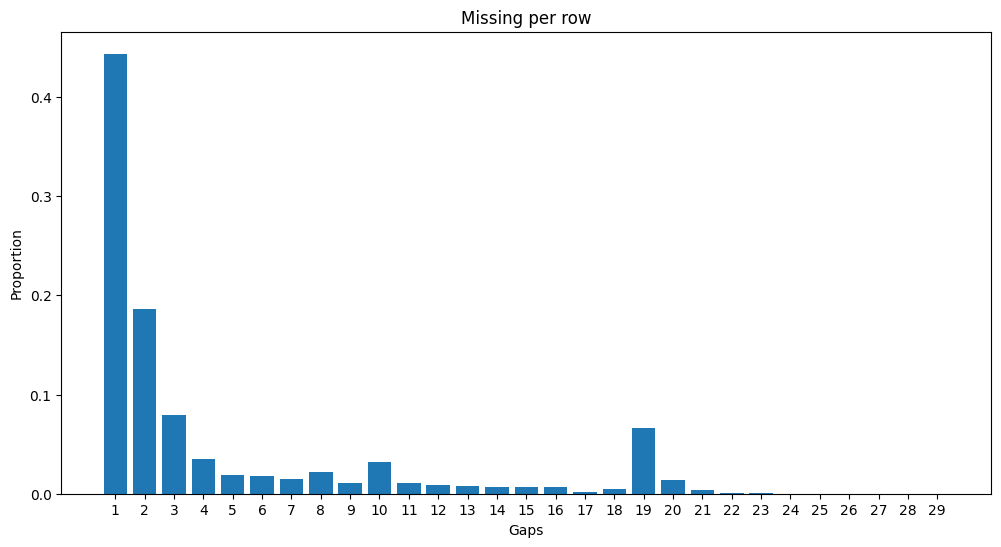

In [10]:
gaps_proportions = train_set[train_set.isnull().any(axis=1)].isnull().sum(axis=1).value_counts(normalize=True)
gaps_proportions = gaps_proportions.sort_index()

fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
ax.bar(gaps_proportions.sort_index().index, gaps_proportions)
ax.set_title("Missing per row")
ax.set_ylabel("Proportion")
ax.set_xlabel("Gaps")
ax.set_xticks(gaps_proportions.index)
ax.set_xticklabels(gaps_proportions.index)

plt.show()

In [11]:
def get_gaps_by_percentile(percentile):
    return np.argmax(np.cumsum(gaps_proportions.sort_index()) >= percentile)
print(f"Gaps 75 percentile: {get_gaps_by_percentile(0.75)} gaps\n\
Gaps 90 percentile: {get_gaps_by_percentile(0.9)} gaps")

Gaps 75 percentile: 4 gaps
Gaps 90 percentile: 14 gaps


Thus, in nearly half of the cases, the data point contains only 1 missing value. After that, the number of missing values drops sharply, and **having more than 5 missing values in a data point is quite a rare** occurrence (this requires special attention).

### MCAR (Missing Completely at Random)

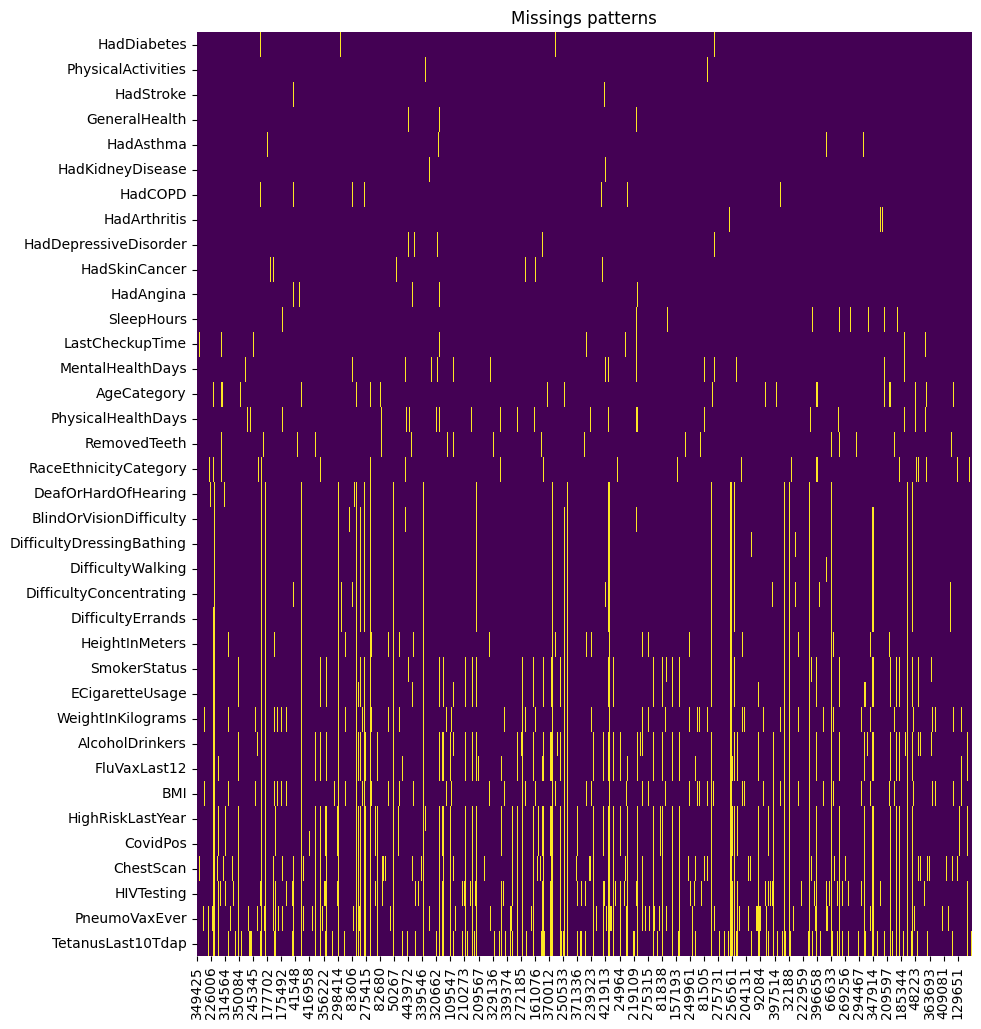

In [18]:
def visualize_missing_patterns(df):
    df = df[df.columns[df.isnull().any()]]
    df = df[df.isnull().sum().sort_values().index] # sort columns order by NAs amount
    plt.figure(figsize=(10, 12))
    sns.heatmap(df.T.isnull(), cbar=False, cmap='viridis')
    plt.title("Missings patterns")
    plt.show()

visualize_missing_patterns(train_set)

Long vertical lines indicate a large number of simultaneous missing values across several variables. It seems that there are many **MAR** (Missing At Random) missing values in the data. This means that the missing values may be not random and are dependent on other variables.

This suggests the need to apply advanced imputation techniques using machine learning models.

In [19]:
from scipy import stats

def test_missing_completely_at_random(df):
    results = []
    df = df.copy()
    cols_with_missing = df.columns[df.isnull().any()]
    
    for col in cols_with_missing:
        missing_indicator = df[col].isnull().astype(int)
        other_cols = df.columns.drop(col)
        
        for other_col in other_cols:
            if df[other_col].isnull().all():
                continue  
            if df[other_col].dtype.kind in 'biufc': 
                group1 = df.loc[missing_indicator == 1, other_col].dropna()
                group2 = df.loc[missing_indicator == 0, other_col].dropna()
                if len(group1) > 1 and len(group2) > 1:
                    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
                    results.append({
                        'Variable with Missing': col,
                        'Compared Variable': other_col,
                        'Test': 't-test',
                        'p-value': p_value
                    })
            else:
                contingency_table = pd.crosstab(missing_indicator, df[other_col].fillna('Missing'))
                if contingency_table.shape[0] == 2 and contingency_table.shape[1] >= 2:
                    chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
                    results.append({
                        'Variable with Missing': col,
                        'Compared Variable': other_col,
                        'Test': 'chi-square',
                        'p-value': p_value
                    })
    results_df = pd.DataFrame(results)
    return results_df

results_df = test_missing_completely_at_random(train_set)

significant_results = results_df[results_df['p-value'] > 0.05]
significant_results.shape

(90, 4)

In [20]:
print(f"The proportion of combinations where the features are independent: {round(significant_results.shape[0] / results_df.shape[0], 2) * 100}%")

The proportion of combinations where the features are independent: 6.0%


The preliminary hypothesis is confirmed. Only 6% of the feature combinations are independent. If we explore relationships more complex than pairwise, I believe this number could decrease to values close to zero.

### Missing combinations

The next logical question is: which specific combinations of missing values are the most common? Given that most of the missing values are likely MAR, this could provide us with important information about their nature and interrelationships.

In [12]:
missing_mask = train_set.isnull().loc[train_set.isnull().any(axis=1)]
missing_combinations = missing_mask.groupby(list(train_set.columns)).size().reset_index(name="count")
missing_combinations["proportion"] = round(missing_combinations["count"] / missing_combinations["count"].sum() * 100, 2) 
missing_combinations = missing_combinations.sort_values(by=["proportion"], ascending=False).reset_index(drop=True)

In [13]:
combinations_cumsum = np.cumsum(missing_combinations)
combinations_75_percentile = np.argmax(combinations_cumsum['proportion'] >= 75)
combinations_90_percentile = np.argmax(combinations_cumsum['proportion'] >= 90)

print(f"Summary proportion of all missing values by first 10 most frequent combinations: \
{round(combinations_cumsum.loc[10, 'proportion'], 2)}\
\n75 percentile: {combinations_75_percentile}\
\n90 percentile: {combinations_90_percentile}")

Summary proportion of all missing values by first 10 most frequent combinations: 47.87
75 percentile: 68
90 percentile: 584


In [14]:
pd.set_option('display.max_colwidth', None)

combinations_table = missing_combinations.loc[:10].copy()
combinations_table["Features combinations"] = combinations_table.apply(
    lambda row: (", ").join([col for col in combinations_table.columns if combinations_table.loc[row.name, col] and col not in ["count", "proportion"]]), axis=1
)
combinations_table = combinations_table[["Features combinations", "proportion"]]
combinations_table

Features combinations  \
0                                                                                                                                                                                                                                                                                                                   TetanusLast10Tdap   
1                                                                                                                                                                                                                                                                                                                       PneumoVaxEver   
2   DeafOrHardOfHearing, BlindOrVisionDifficulty, DifficultyConcentrating, DifficultyWalking, DifficultyDressingBathing, DifficultyErrands, SmokerStatus, ECigaretteUsage, ChestScan, HeightInMeters, WeightInKilograms, BMI, AlcoholDrinkers, HIVTesting, FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap, HighRiskLastYear, CovidPos   
3                                                                                                                                                                                                                                                                                                                          HIVTesting   
4                                                                                                                                                                                                                                                                                                              WeightInKilograms, BMI   
5                                                                                                                                                                                                                                                                                                                           ChestScan   
6                                                                                                                                                                                   SmokerStatus, ECigaretteUsage, ChestScan, AlcoholDrinkers, HIVTesting, FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap, HighRiskLastYear, CovidPos   
7                                                                                                                                                                                                                                                                                                               RaceEthnicityCategory   
8                                                                                                                                                                                                                                                                                                                        RemovedTeeth   
9                                                                                                                                                                                                                  ChestScan, AlcoholDrinkers, HIVTesting, FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap, HighRiskLastYear, CovidPos   
10                                                                                                                                                                                                                                                                                                                 PhysicalHealthDays   

    proportion  
0         9.58  
1         8.63  
2         6.54  
3         4.66  
4         4.18  
5         3.66  
6         2.71  
7         2.56  
8         2.10  
9         1.74  
10        1.51

We can notice a strong connection between different features of missing values in the third most common combination, while noting that rows with more than 4 missing values are rare. 

However, the number of features involved 19 features simultaneously seems unusual. Although this aligns well with the previous analysis of missing values in the data.

# EDA

## Univariate analysis

In [7]:
num_features = train_set.select_dtypes(include=[np.number]).columns
print(num_features)

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')


I want to divide categorical features into binary, because the approach to visualizating them differs from visualizating non-binary features (difficulties with visualizing x asix labels)

In [8]:
binary_features = [col for col in train_set.columns if train_set[col].value_counts().shape[0] == 2]
multiclass_features = list(set(binary_features) ^ set(cat_features))

In [12]:
import textwrap
import math

def plot_num_distribs(df, num_cols=2, n_bins=20):
    if isinstance(df, pd.Series):
        df = df.to_frame(name=df.name)
        
    num_rows = len(df.columns) // num_cols + 1 
    fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(num_cols * 14, num_rows * 10), dpi=100)

    axes = axes.flatten()
    fig.subplots_adjust(wspace=1.5, hspace=1.8)

    for i, col in enumerate(df.columns):
        N, bins, patches = axes[i].hist(df[col], bins=n_bins)
        axes[i].set_xticks(bins)
        axes[i].set_title(col, fontsize=35)
        axes[i].set_ylabel("Count", fontsize=30)
        axes[i].tick_params(axis="both", which="major", labelsize=20)
        
    if len(axes) > len(df.columns):
        for i in range(len(df.columns), len(axes)):
            fig.delaxes(axes[i])
            
    plt.tight_layout()
    plt.show()
    
def plot_cat_distribs(df, num_cols=3):
    if isinstance(df, pd.Series):
        df = df.to_frame(name=df.name)
        
    num_rows = len(df.columns) // num_cols + 1 
    
    fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(num_cols * 8, num_rows * 6), dpi=100)

    axes = axes.flatten()
    fig.subplots_adjust(wspace=1.5, hspace=1.8)

    for i, col in enumerate(df.columns):
        cat_col = df[col].value_counts(normalize=True).sort_index()
        indices = range(len(cat_col))
        # Split long labels into rows
        labels = [textwrap.fill(str(label), 10) for label in cat_col.index]
        
        axes[i].bar(cat_col.index, cat_col)
        axes[i].set_title(col, fontsize=30)
        axes[i].set_ylabel("Proportion", fontsize=25)
        axes[i].set_xticks(indices)
        axes[i].set_xticklabels(labels)
        axes[i].tick_params(axis="both", which="major", labelsize=20)
        axes[i].margins(x=0.01)

        
    if len(axes) > len(df.columns):
        for i in range(len(df.columns), len(axes)):
            fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### Target feature

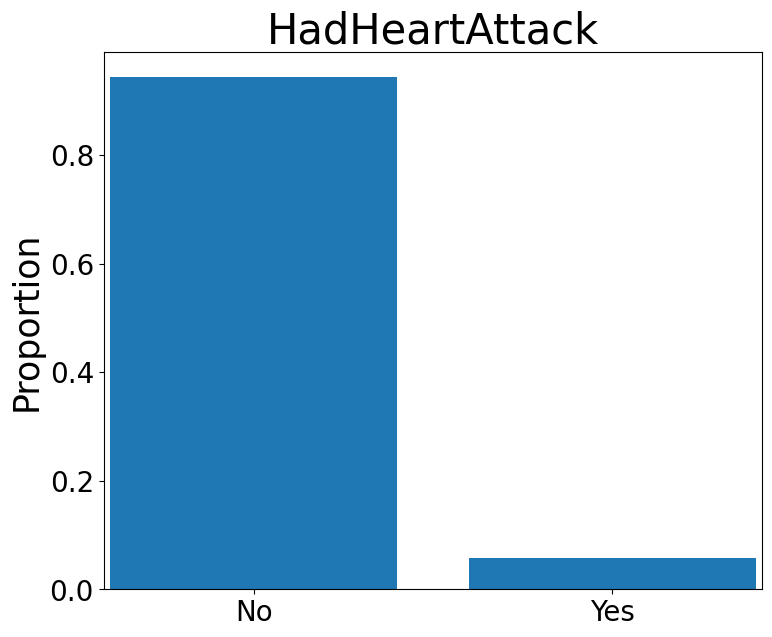

In [27]:
plot_cat_distribs(train_set[target_feature], 1)

The target variable exhibits a significant class imbalance, with a ratio of 9 to 1. This may become a problem going forward. Evaluation becomes complicated, as it's enough to constantly predict the negative class to achieve 90% accuracy — it's essential to use a confusion matrix.

Additionally, the model may learn to mostly distinguish the negative class of the target variable (absence of a heart attack).

### Num Features

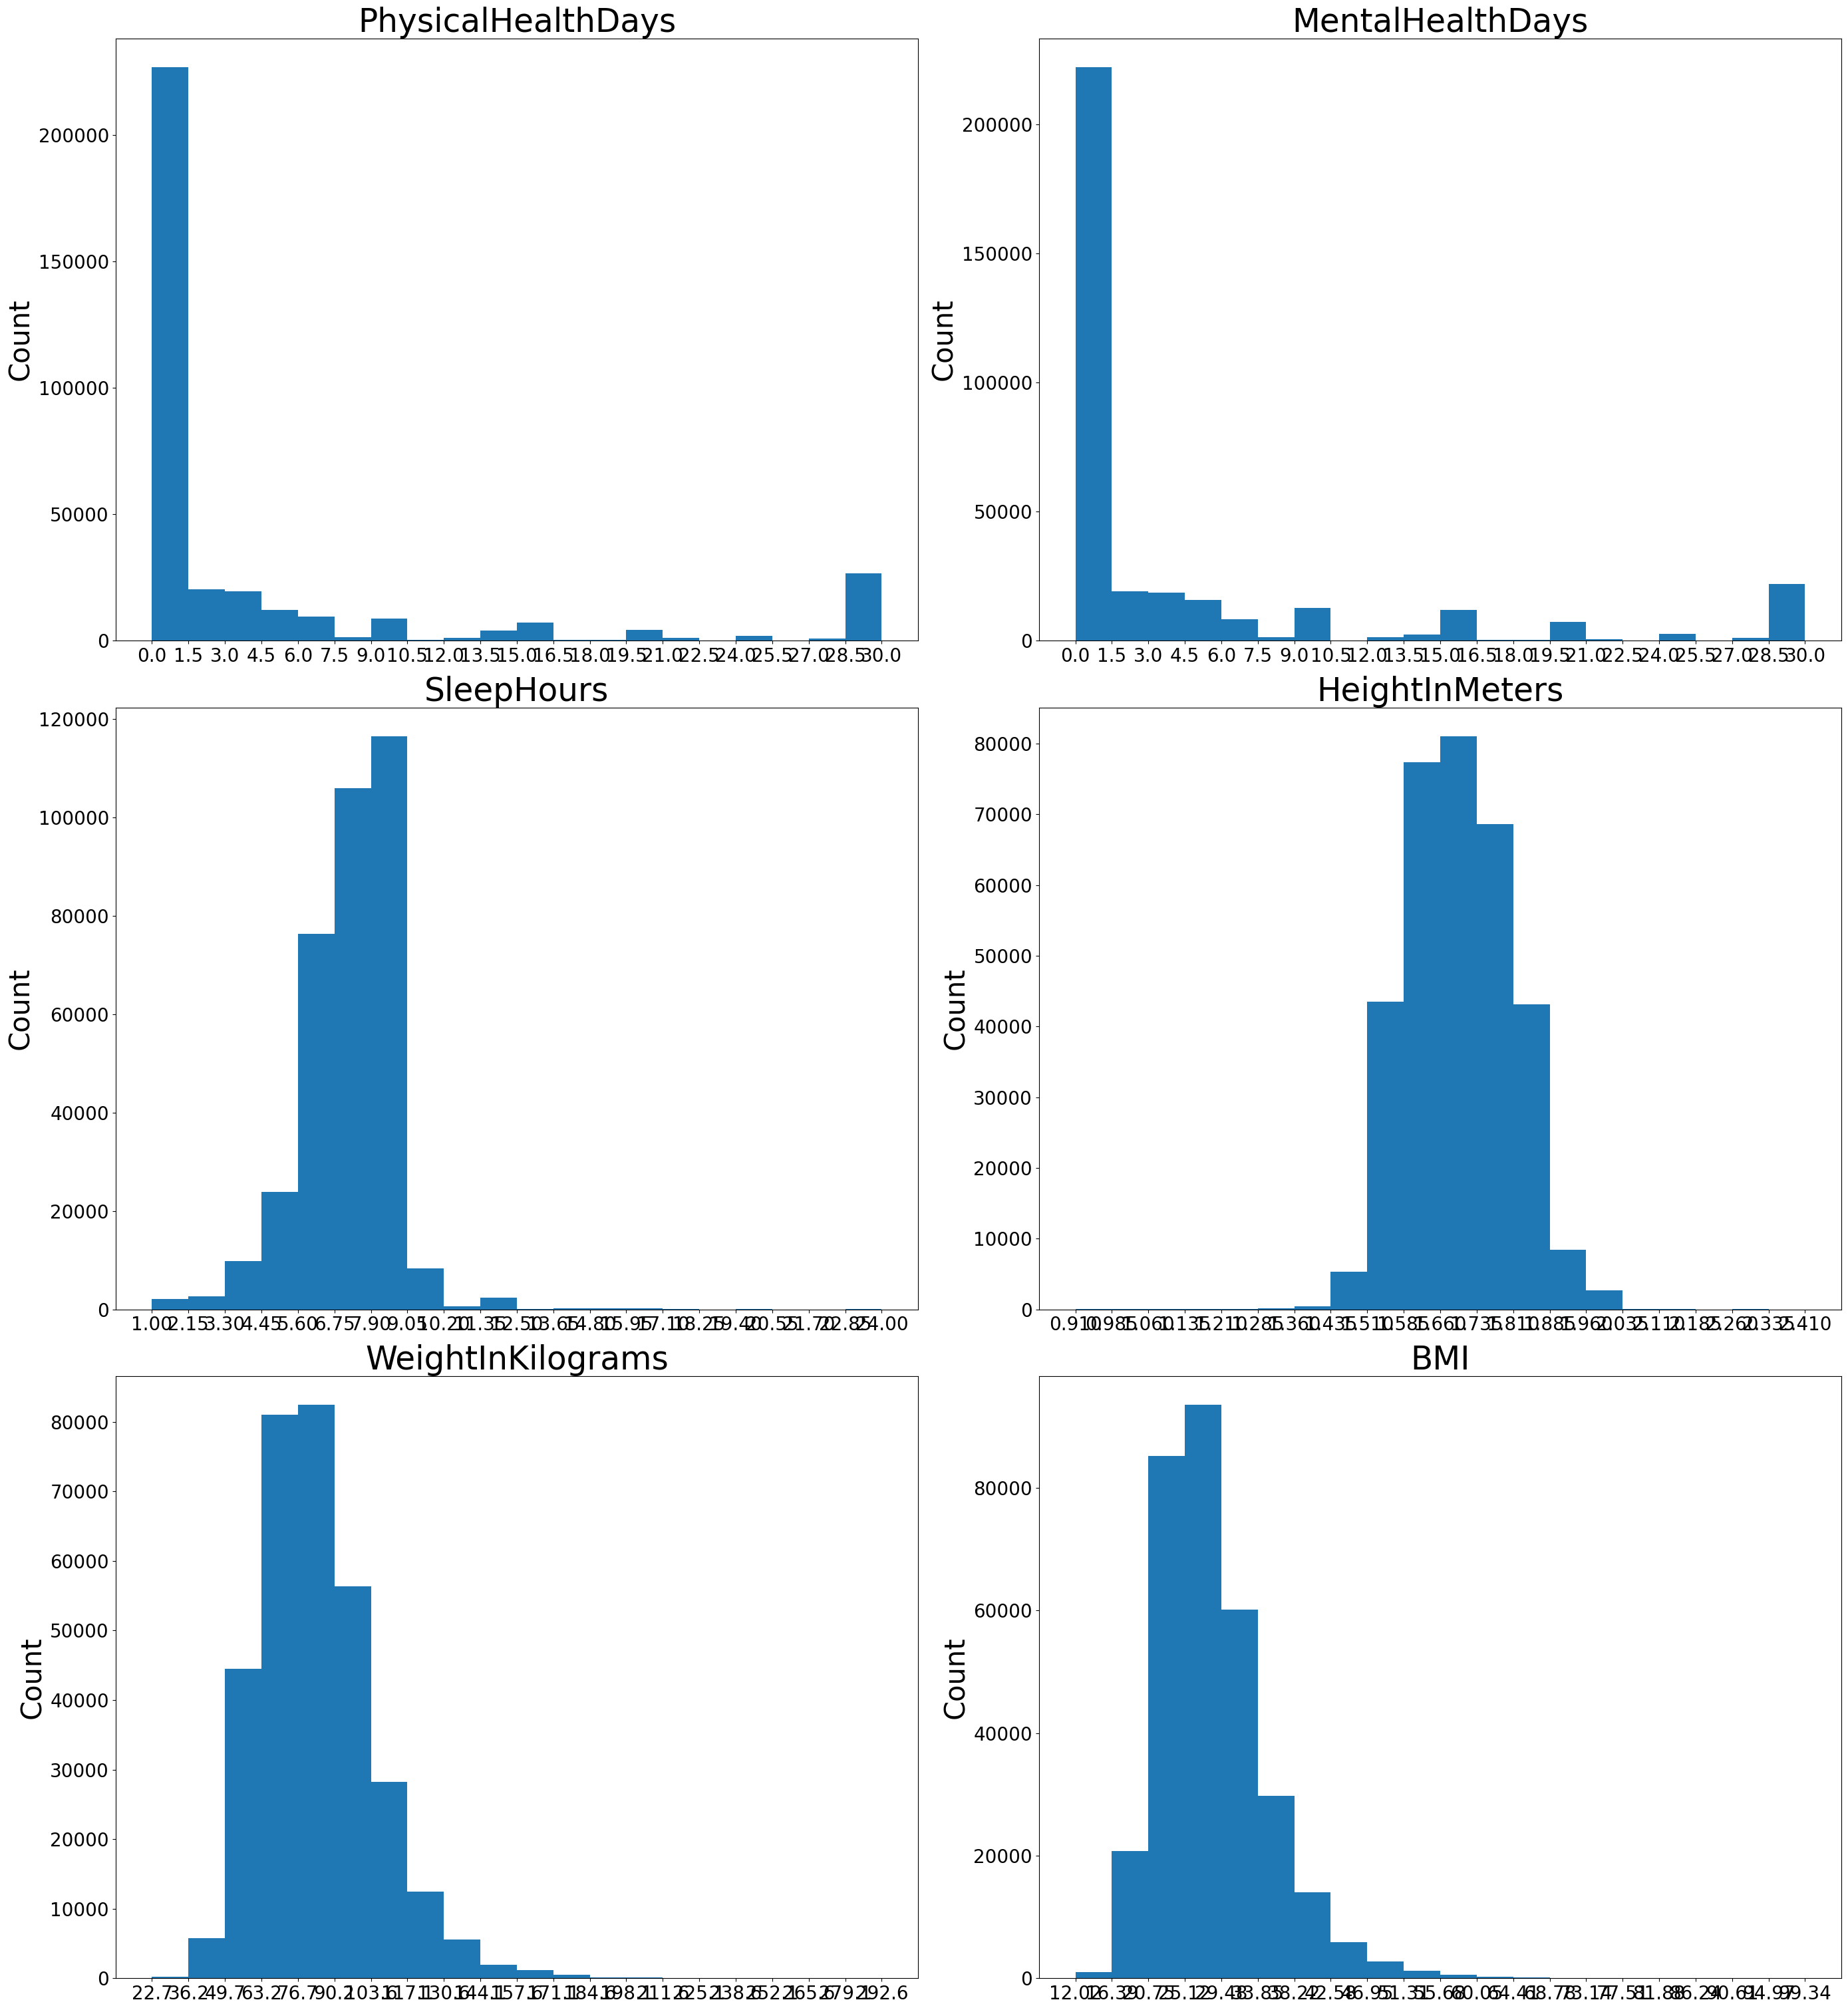

In [28]:
plot_num_distribs(train_set[num_features], n_bins=20)

We can immediately see the problem — **the distributions are not very symmetric** (Gaussian). This is an issue, as *gradient algorithms and data scaling work best with normal distributions*.

Therefore, it makes sense to try to transform the data distributions into normal ones. 

In the case of **Mental** and **Physical Health Days**, we have more of a binomial distribution than a flattened one. Although the mode at the value of '30' is small, it is significant enough to hinder normalization using standard methods.

For the other numerical features, it makes sense to try standard methods such as logarithmic transformation, square root transformation, or Yeo-Johnson transformation.

#### Transfromations comparison

In [13]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson")
pt.set_output(transform="pandas")

yeo_johnson = pt.fit_transform(train_set[num_features]).rename(columns=lambda col: "yeo_" + col)
log_transformed = np.log1p(train_set[num_features]).rename(columns=lambda col: "log_" + col)
sqrt_transformed = np.sqrt(train_set[num_features]).rename(columns=lambda col: "sqrt_" + col)

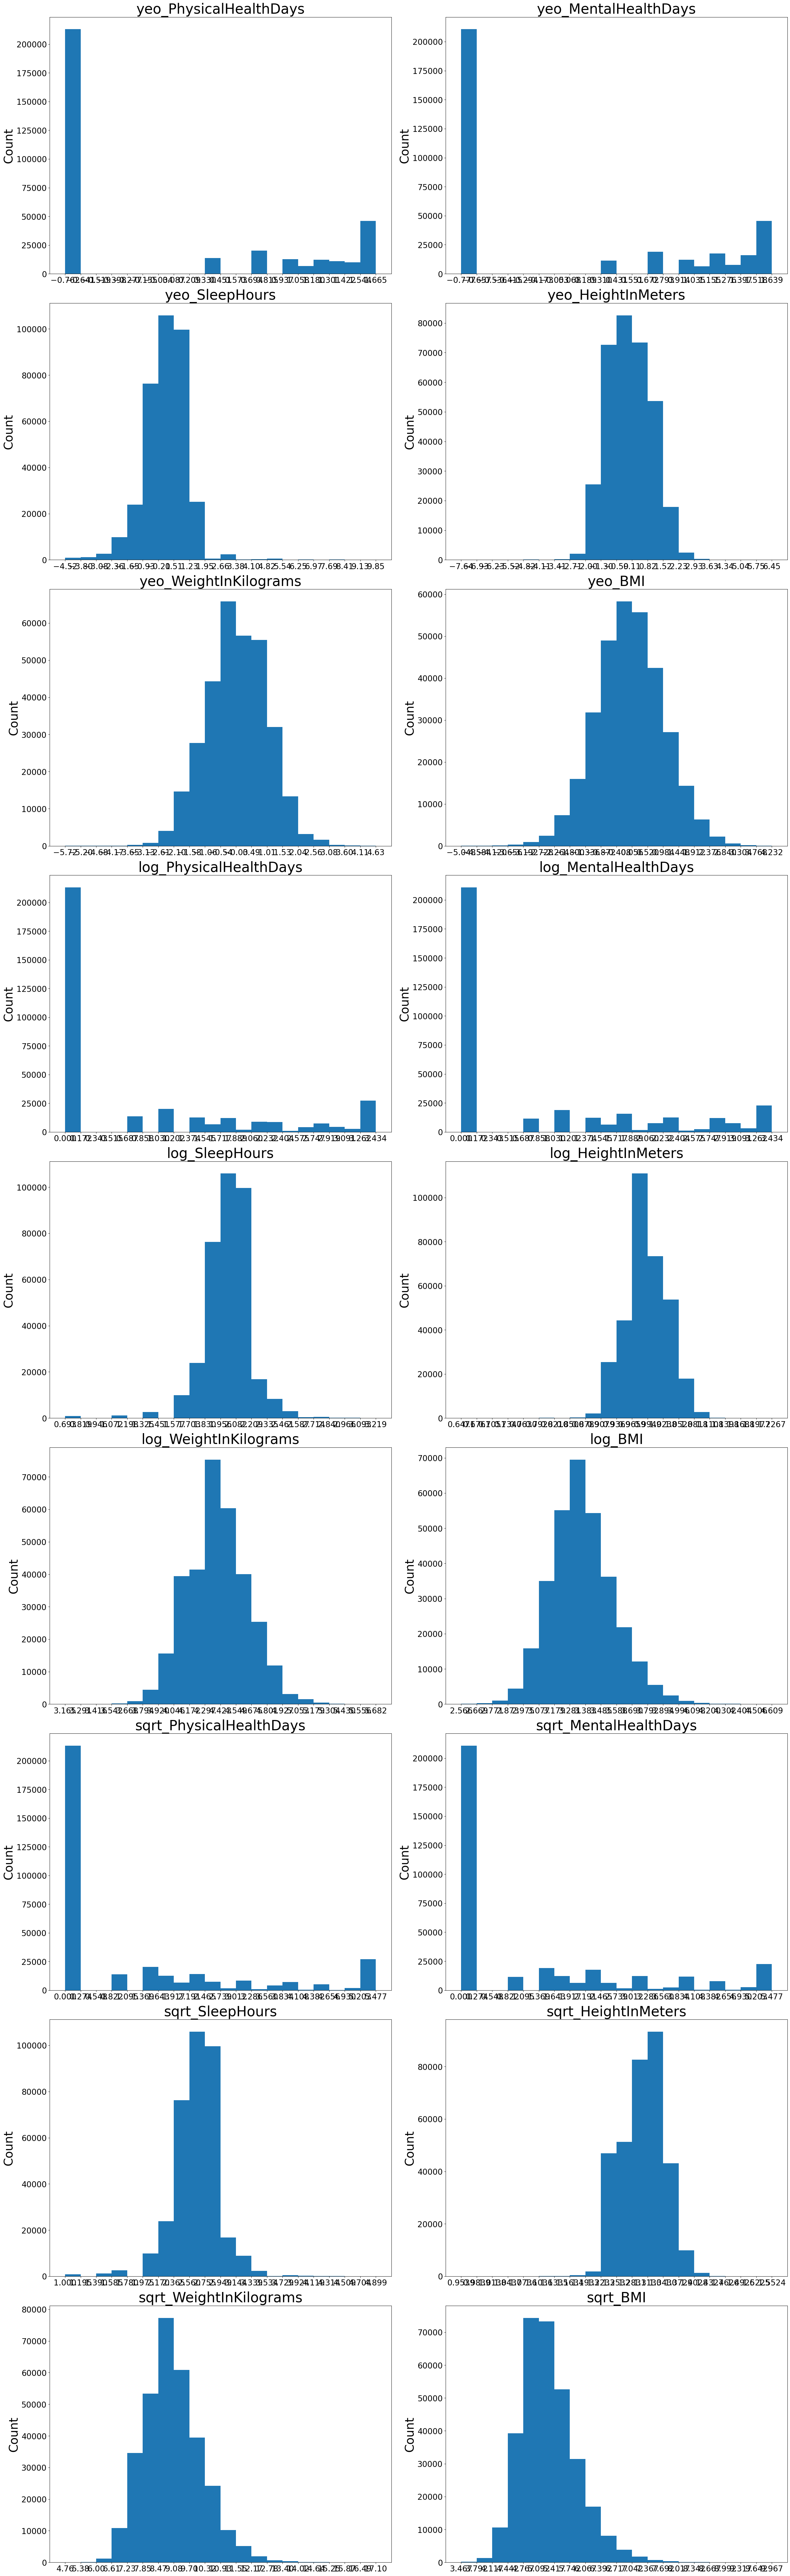

In [30]:
plot_num_distribs(pd.concat([yeo_johnson, log_transformed, sqrt_transformed]), 2)

It seems that a logarithmic transformation will be more than sufficient. There’s no need for a Yeo-Johnson transformation unless it yields significantly better results, as its transformation is non-linear, which could complicate the performance of some models.

However, **there is clearly a problem with the Mental and Physical Health Days features**. Their distributions evidently contain two modes. This issue can be easily resolved by splitting the distributions into a smaller number of bins and converting them into categorical variables. Alternatively, one could use Gaussian RBF to transform each mode into a similarity point.

But with Gaussian RBF, we will need to tune the similarity parameter, which can be quite complex. Moreover, the transformation may be highly non-linear.

The option of splitting into bins does lead to some loss of information, but overall it is simpler. Additionally, based on the data, I can hypothesize the number of bins and their rationale, which, if correctly applied, will minimize information loss:

1. **0-3 days** - Individuals who do not suffer from prolonged psychological or physical problems.
2. **3-7 days** - Temporary issues; an unpleasant event may have occurred in their life.
3. **8-14 days** - The emergence of a permanent source of physical or mental problems in their life.
4. **14-29 days** - Individuals who may have been suffering from psychological or physical problems for a long time and can specify the exact number of days. Likely, these are people who have experienced significant changes in their life over the past few weeks.
5. **30+ days** - Individuals who have been suffering from mental or physical problems for a very long time.

#### Binning bimodal distributions

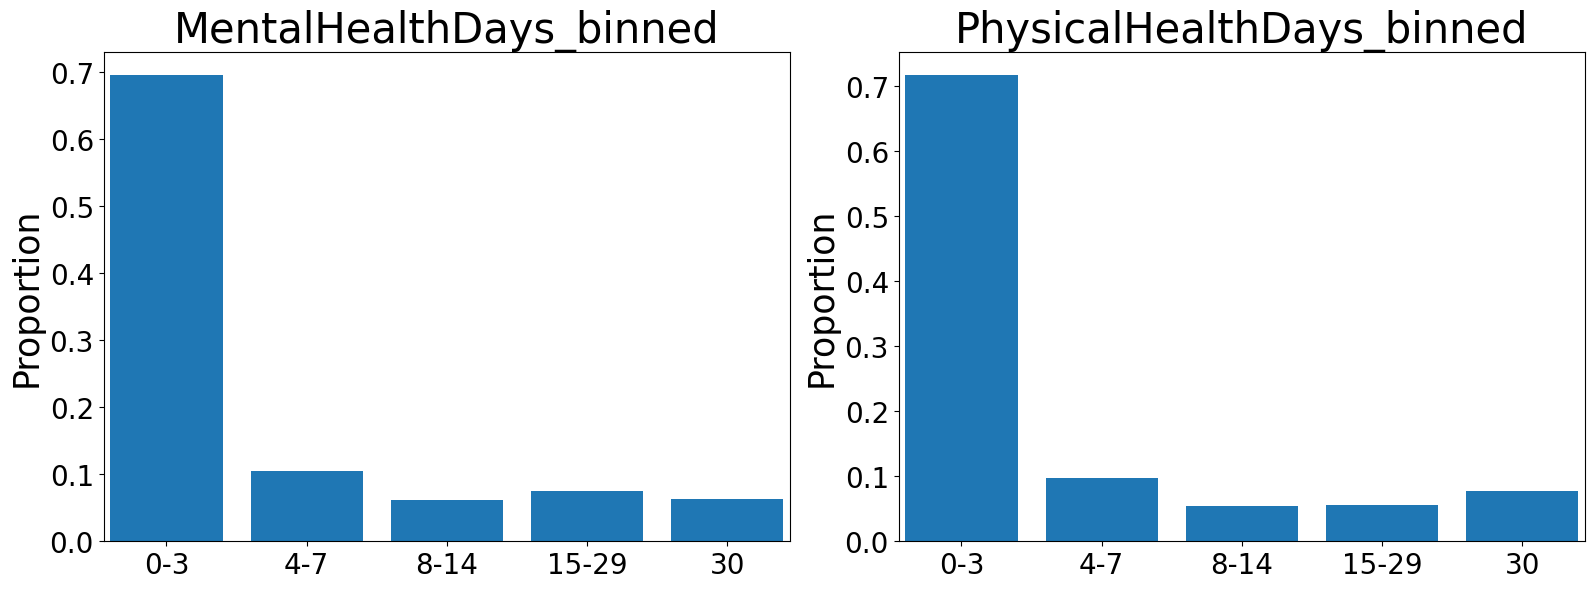

In [14]:
bimodal_features = ["MentalHealthDays", "PhysicalHealthDays"]
bins = [0, 3, 7, 14, 29, float("inf")]
labels = ["0-3", "4-7", "8-14", "15-29", "30"]
mental_binned = pd.cut(train_set[bimodal_features[0]], bins=bins, labels=labels, right=False)
physical_binned = pd.cut(train_set[bimodal_features[1]], bins=bins, labels=labels, right=False)

mental_binned.name = "MentalHealthDays_binned"
physical_binned.name = "PhysicalHealthDays_binned"

plot_cat_distribs(pd.concat([mental_binned, physical_binned], axis=1))

Well, the distributions for both features turned out to be approximately the same. This could be because physical problems cause mental ones, or vice versa. It will be necessary to check the relationship between these features for **multicollinearity**.

### Categorical Features

### Binary features

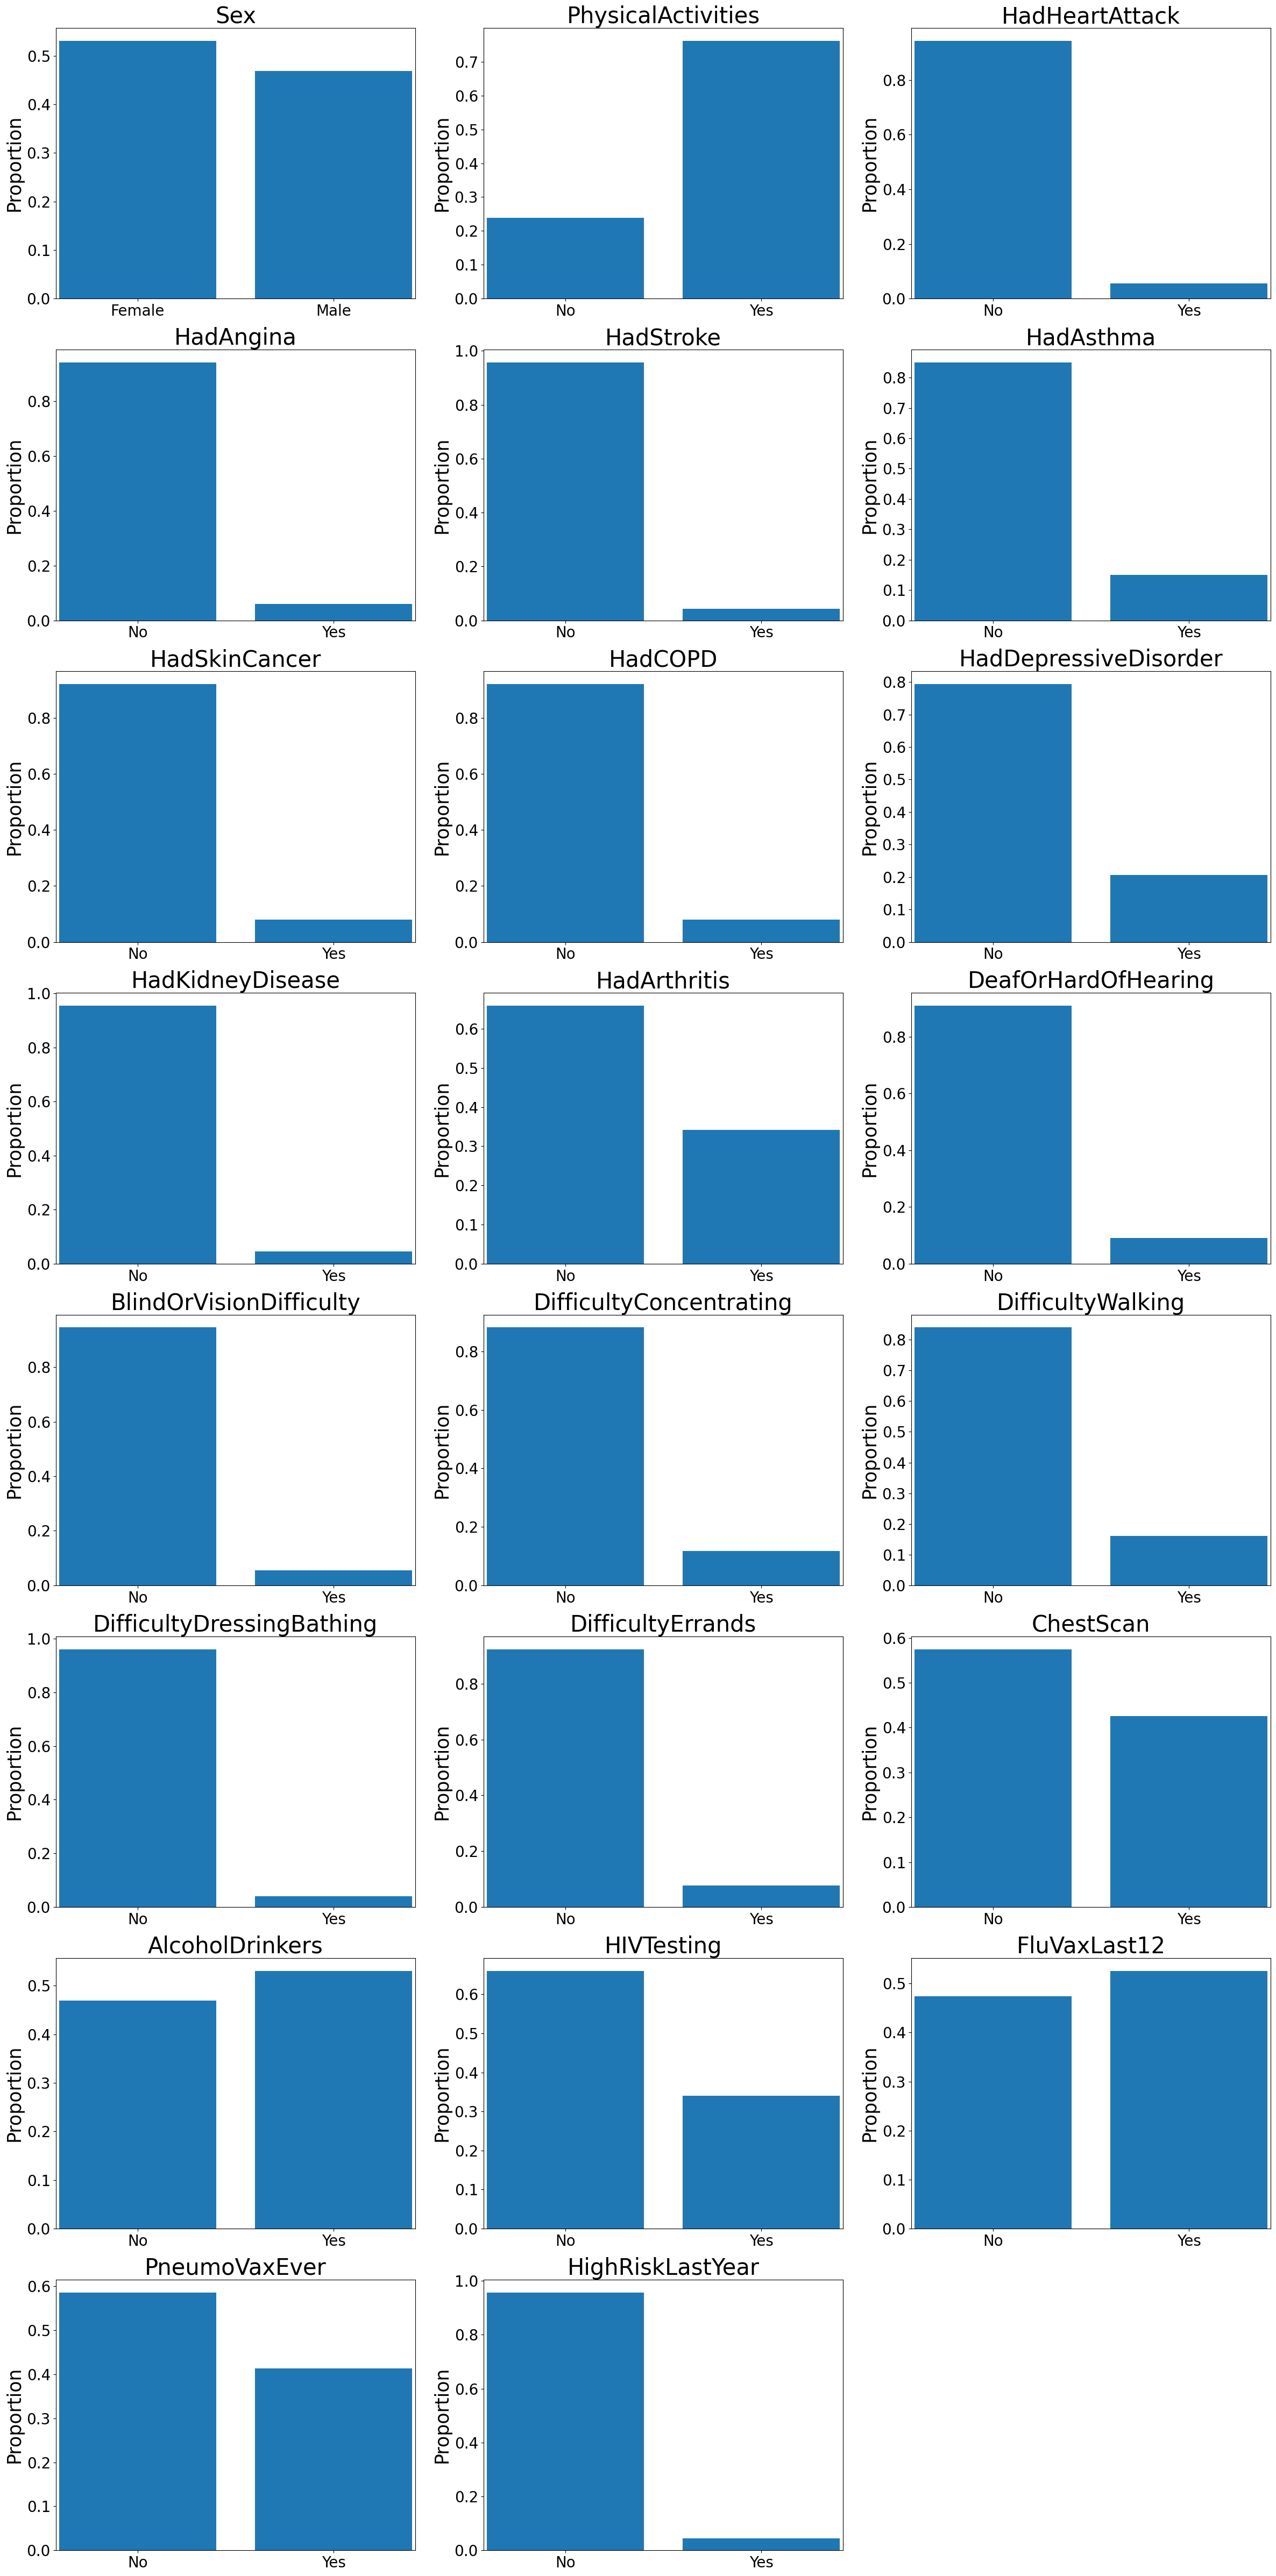

In [32]:
plot_cat_distribs(train_set[binary_features])

We can see a significant class imbalance in almost all binary features.

What is surprising is the nearly 20% prevalence of the 'Yes' class for the **HadDepressiveDisorder** variable. Although [official statistics](https://www.nimh.nih.gov/health/statistics/major-depression) indicate that only 6% of all adults in the USA have experienced major depressive disorder on the state of 2021 year.

Additionally, the first indirect evidence of *variable leakage* that I previously suspected is emerging. Specifically: **DifficultyWalking, DifficultyDressingBathing, DifficultyErrands, HadAngina, and HadStroke.**

All of these features have a significant class imbalance. If it is further determined that the minority class closely correlates with the occurrence of a heart attack, this will provide strong evidence of leakage.

In [33]:
leaky_features.iloc[[2, 3, 4, 9, 10], 1] += 1
leaky_features

Feature  Confidence Notes
0               PneumoVaxEver           0      
1       HadDepressiveDisorder           0      
2           DifficultyWalking           1      
3   DifficultyDressingBathing           1      
4            DifficutlyErrand           1      
5            MentalHealthDays           0      
6          PhysicalHealthDays           0      
7               GeneralHealth           0      
8                   ChestScan           0      
9                   HadAngina           1      
10                  HadStroke           1

#### Multiclass discrete feautures

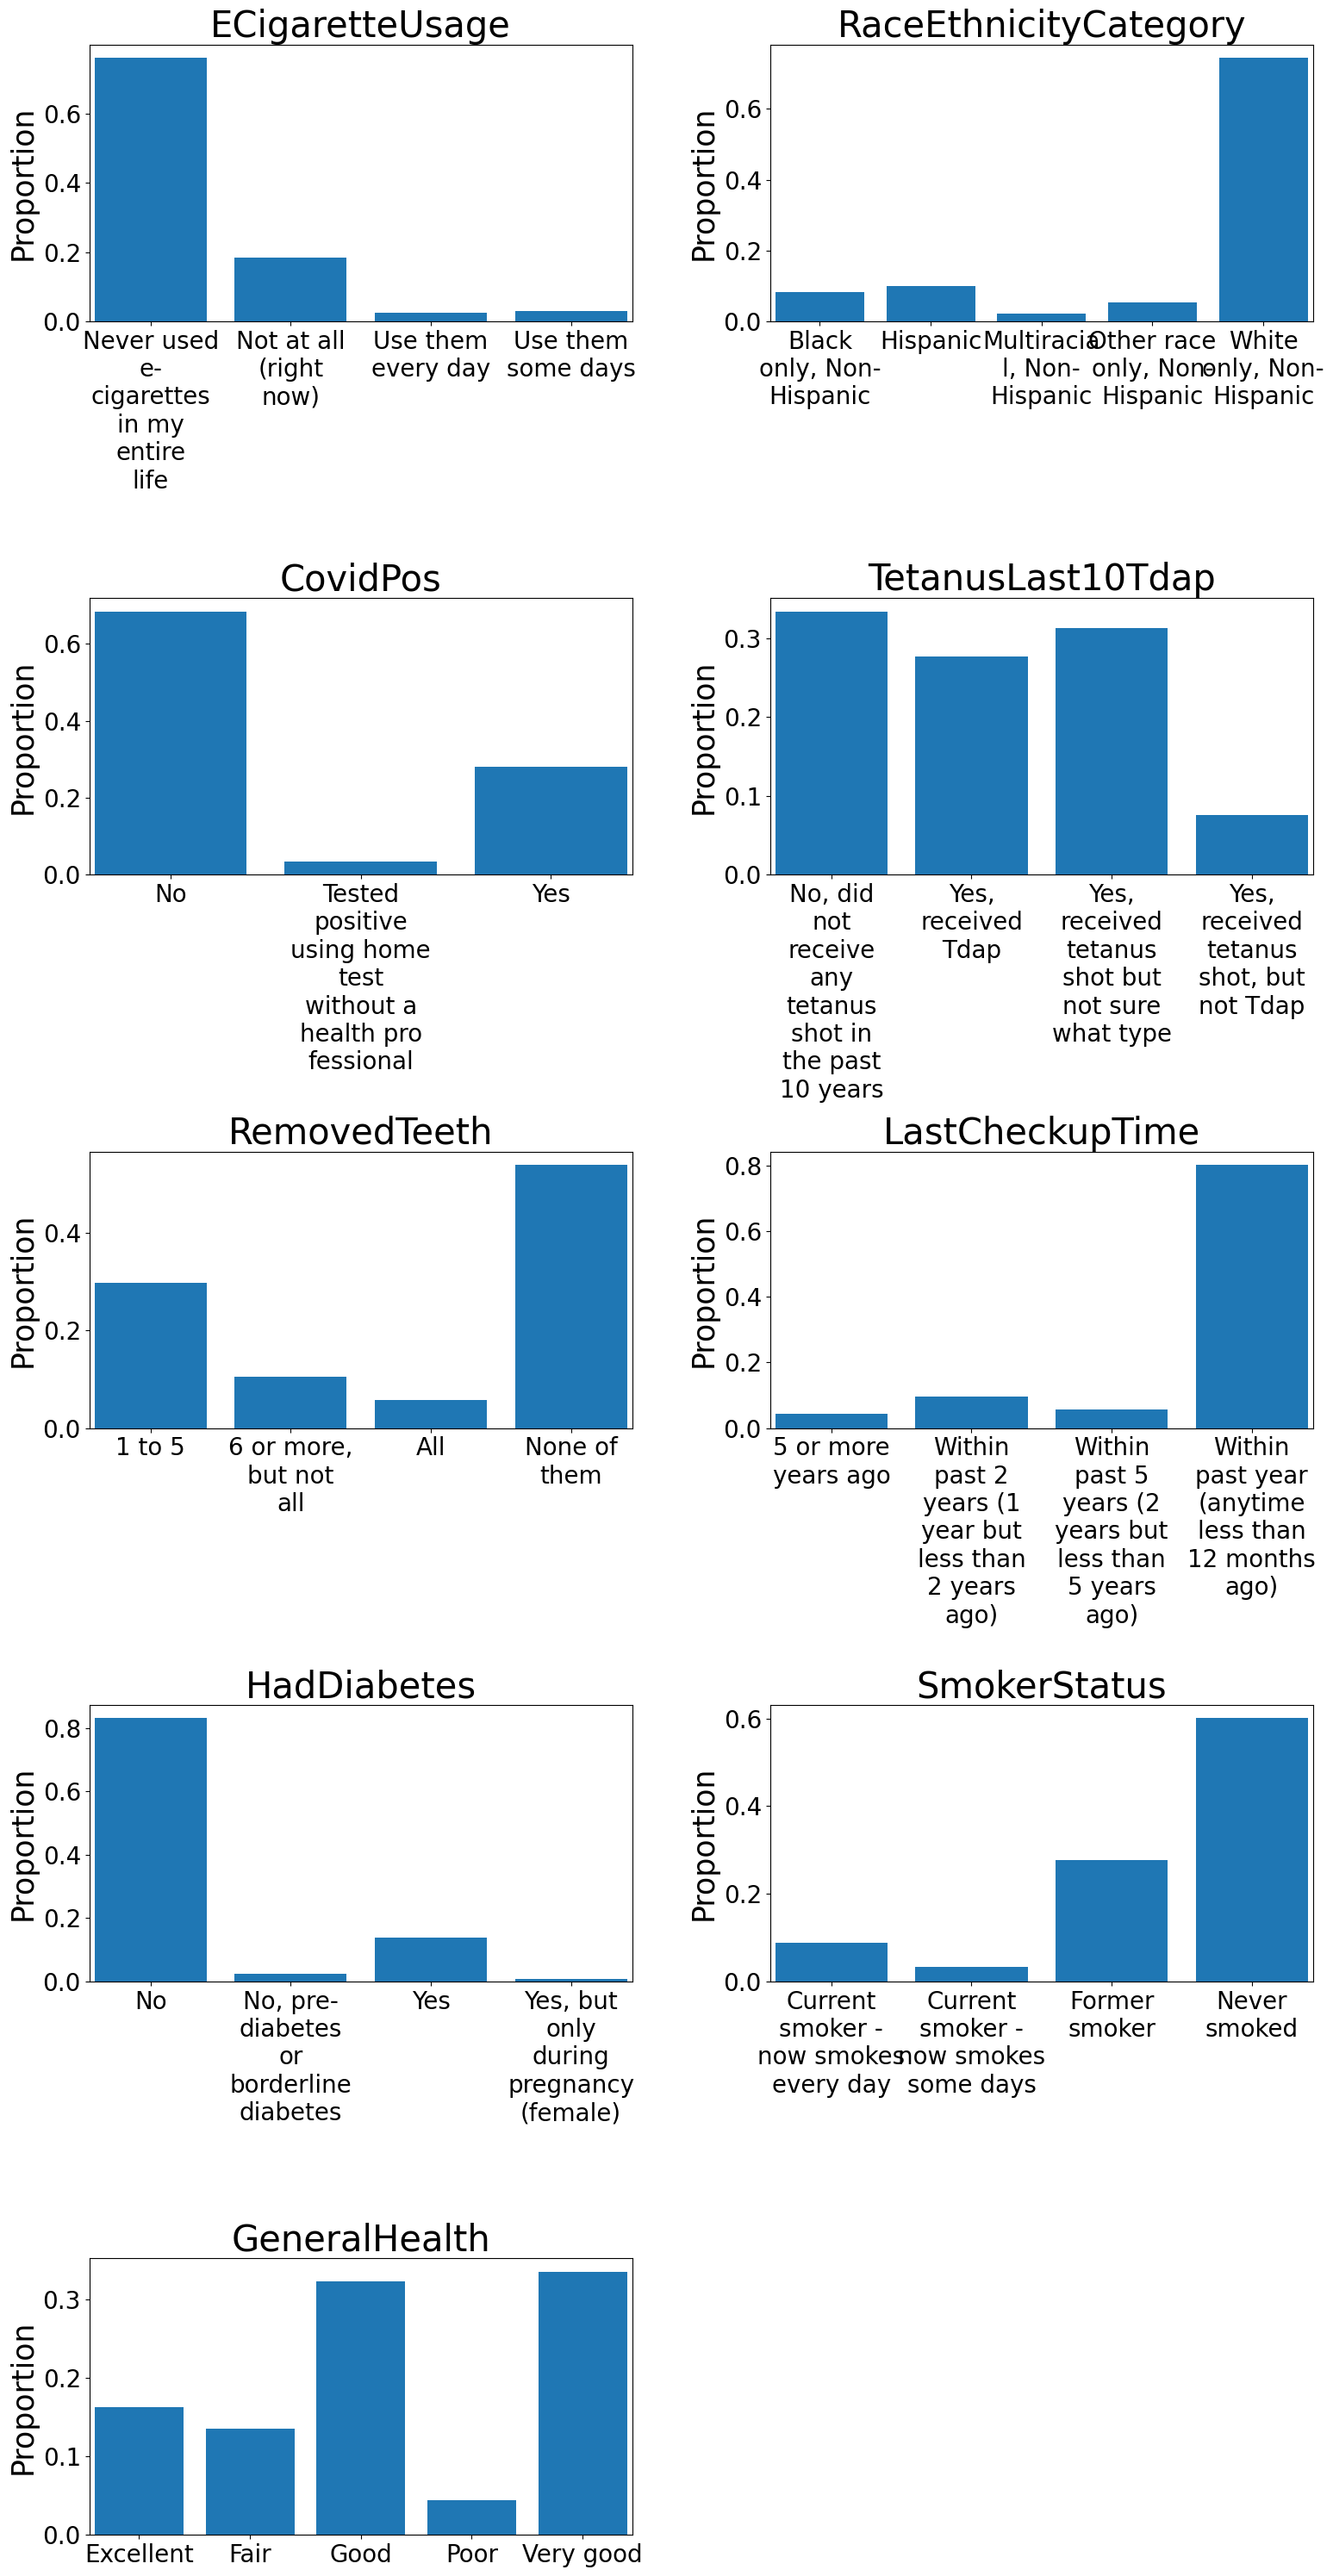

In [20]:
multiclass_features.remove("AgeCategory")
plot_cat_distribs(train_set[multiclass_features], num_cols=2)

We can see very interesting statistics for **GeneralHealth**. Only 20% of people rate their health status as poor or normal. The rest have a fairly positive view of their health. 

The **RaceEthnicityCategory** variable raises concerns. More than 70% belong to the 'White, Non-Hispanic' category, while the other 5 classes share the remaining 30%. This variable may not be leaking, but if it becomes evident that there is no significant difference in heart attack frequency among the classes, *it may be worth considering its removal*.

In [35]:
leaky_features.iloc[7, 1] += 1
leaky_features

Feature  Confidence Notes
0               PneumoVaxEver           0      
1       HadDepressiveDisorder           0      
2           DifficultyWalking           1      
3   DifficultyDressingBathing           1      
4            DifficutlyErrand           1      
5            MentalHealthDays           0      
6          PhysicalHealthDays           0      
7               GeneralHealth           1      
8                   ChestScan           0      
9                   HadAngina           1      
10                  HadStroke           1

The current class labels in AgeCategory are too long, which hinders visualization, as demonstrated by a series of independent runs. Therefore, I shortened the length of the labels while preserving their meaning.

In [17]:
from utils.utils import format_age

train_set["AgeCategory"] = train_set["AgeCategory"].apply(format_age, axis=1)    
test_set["AgeCategory"] = test_set["AgeCategory"].apply(format_age, axis=1)    
train_set["AgeCategory"]

349425    65-69
149324    18-24
64211     75-79
43949     45-49
287847    75-79
          ...  
78859       80+
168560    50-54
55713     70-74
182577    60-64
315794    30-34
Name: AgeCategory, Length: 353653, dtype: object

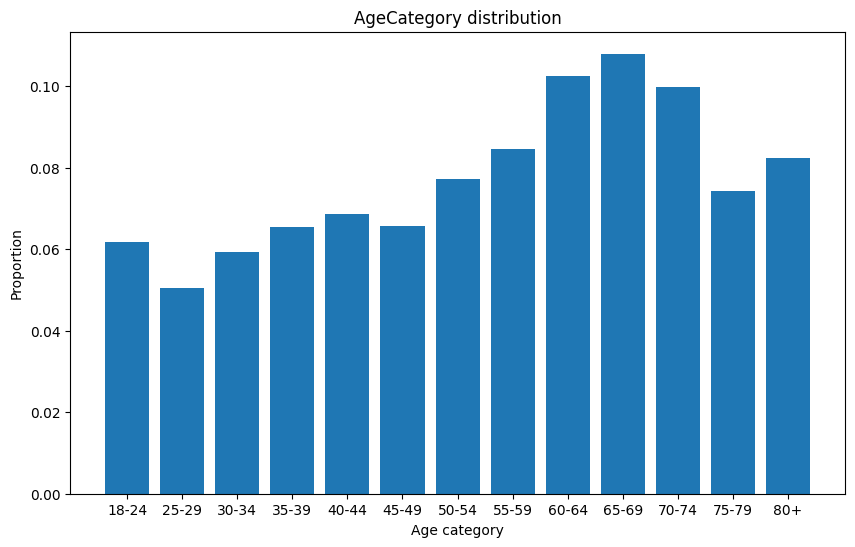

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(train_set["AgeCategory"].value_counts().sort_index().index, train_set["AgeCategory"].value_counts(normalize=True).sort_index())
ax.set_title("AgeCategory distribution")
ax.set_xlabel("Age category")
ax.set_ylabel("Proportion")
plt.show()

## Bivariate analysis

### Categorical Features

In [18]:

def plot_cat_correlations(df, num_cols=3):
    if isinstance(df, pd.Series):
        df = df.to_frame(name=df.name)
    
    num_rows = len(df.columns) // num_cols + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 8, num_rows * 6), dpi=100)
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        categories = df[col].unique()
        
        def positive_rate(category):
            if pd.isna(category):
                category_rows = df[col].isna().sum()
                positive_for_category = ((df[col].isna()) & (train_set[target_feature] == "Yes")).sum()
            else:
                category_rows = (df[col] == category).sum()
                positive_for_category = ((df[col] == category) & (train_set[target_feature] == "Yes")).sum()

            if category_rows == 0:
                return 0
            return round(positive_for_category / category_rows, 2)
        
        def category_frequency(category):
            if pd.isna(category):
                return round(df[col].isna().sum() / df.shape[0], 2)
            return round((df[col] == category).sum() / df.shape[0], 2)

        correlations = [positive_rate(category) for category in categories]
        frequencies = [category_frequency(category) for category in categories]

        categories = ['nan' if pd.isna(cat) else cat for cat in categories]
        
        category_data = pd.DataFrame({
            'category': categories,
            'correlation': correlations,
            'frequency': frequencies
        })
        category_data = category_data.sort_values(by='category')

        sorted_categories = category_data['category'].tolist()
        sorted_correlations = category_data['correlation'].tolist()
        sorted_frequencies = category_data['frequency'].tolist()

        ax = axes[i]
        width = 0.4  
        ax.bar(sorted_categories, sorted_correlations, width=width, label='Positive Rate', align='center')
        
        ax2 = ax.twinx()
        ax2.bar([str(cat) for cat in sorted_categories], sorted_frequencies, width=width, label='Category Frequency', align='edge', alpha=0.6, color='orange')

        ax.set_title(col)
        ax.set_ylabel("HadHeartAttack Positive Rate")
        ax2.set_ylabel("Category Frequency")

        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')
        
        # Split long labels into rows
        wrapped_labels = [textwrap.fill(str(cat), 10) for cat in sorted_categories]
        ax.set_xticks(range(len(sorted_categories)))
        ax.set_xticklabels(wrapped_labels, rotation=0)
        
    for i in range(len(df.columns), len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.show()


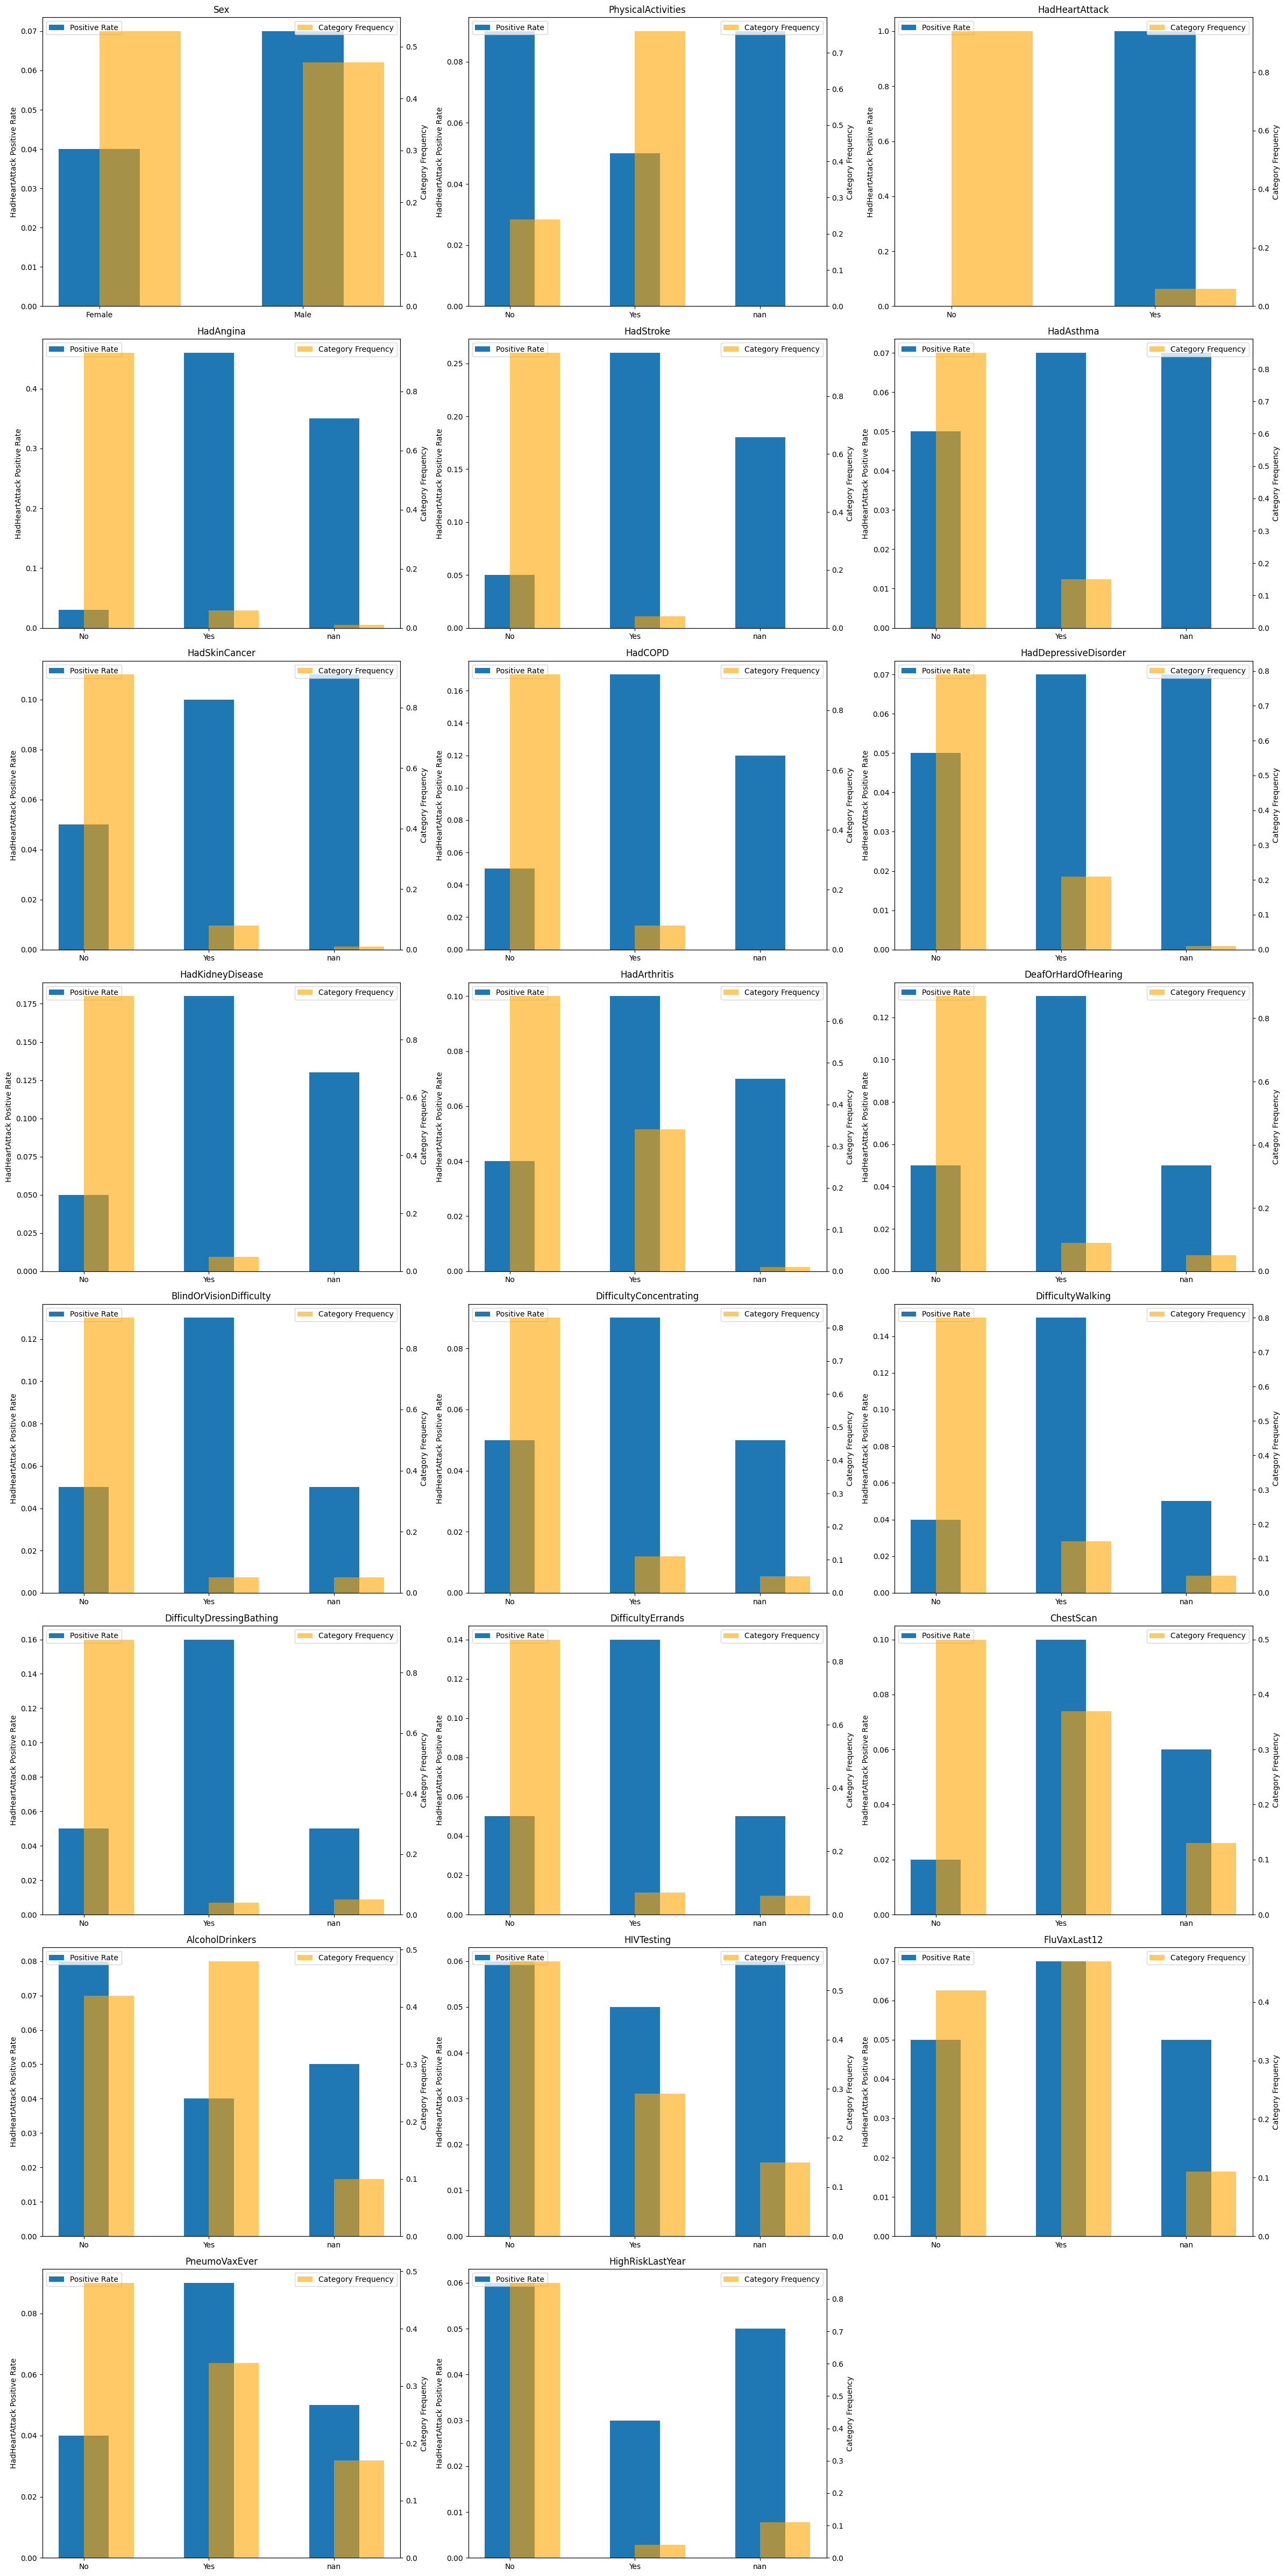

In [39]:
plot_cat_correlations(train_set[binary_features])

By checking the features I previously suspected of leakage, we can obtain initial evidence for these suspicions. 

### Main insights:

1. For the positive class of **HadAngina**, the target variable has a striking positive class frequency of **50%**! The same applies to **HadStroke** at 25%, **DifficultyWalking** at 15%, **DifficultyErrand** at 13%, **ChestScan** at 10% and **PneumoVaxEver** at 9%. All of these features (except for **ChestScan** and **PneumoVaxEver**) exhibit significant class imbalance. Despite the minority status of their positive class, we observe a high frequency of the positive class in the target variable.
2. The missing values in **ChestScan** are pretty very informative. This may be because people felt embarrassed to answer this question honestly. Although the proportion of missing values is quite low, the probability of the positive class in the target variable for this feature triple likely than in "No" class.
3. The probability of the target variable is 13% for missing values in the **DeafOrHardOfHearing** feature, as well as 13% for the positive class of the target variable for the positive class **BlindOrVisionDifficulty**. *There may be more features with leakage than I previously assumed.*
4. What is truly unexpected is that the positive class in the '**AlcoholDrinkers**' category **is twice (!) less associated with heart attacks** than the negative class. It is well known that alcohol consumption is a clear predictor not only for heart diseases but also for a range of physical disorders.
 - However, this becomes quite logical if we assume that people who have experienced a heart attack have reduced or stopped their alcohol consumption. *So, this might be another leaking variable*?

5. Additionally, although indirectly, I can suggest that most of the missing values in these variables are not MNAR (Missing Not At Random). There is almost no informative value in the missing values themselves.

However, the result for the feature **HadDepressiveDisorder** is rather controversial.

In [40]:
leaky_features.loc[leaky_features.shape[0]] = ["DeadOrHardOfHearing", 2, ""]
leaky_features.loc[leaky_features.shape[0]] = ["BlindOrVisionDifficulty", 2, ""]
leaky_features.loc[leaky_features.shape[0]] = ["AlcoholDrinkers", 1, ""]

leaky_features.iloc[8, 2] = "Informative missings"
leaky_features.iloc[[0, 2, 3, 4, 8, 9, 10], 1] += 1 
leaky_features

Feature  Confidence                 Notes
0               PneumoVaxEver           1                      
1       HadDepressiveDisorder           0                      
2           DifficultyWalking           2                      
3   DifficultyDressingBathing           2                      
4            DifficutlyErrand           2                      
5            MentalHealthDays           0                      
6          PhysicalHealthDays           0                      
7               GeneralHealth           1                      
8                   ChestScan           1  Informative missings
9                   HadAngina           2                      
10                  HadStroke           2                      
11        DeadOrHardOfHearing           2                      
12    BlindOrVisionDifficulty           2                      
13            AlcoholDrinkers           1

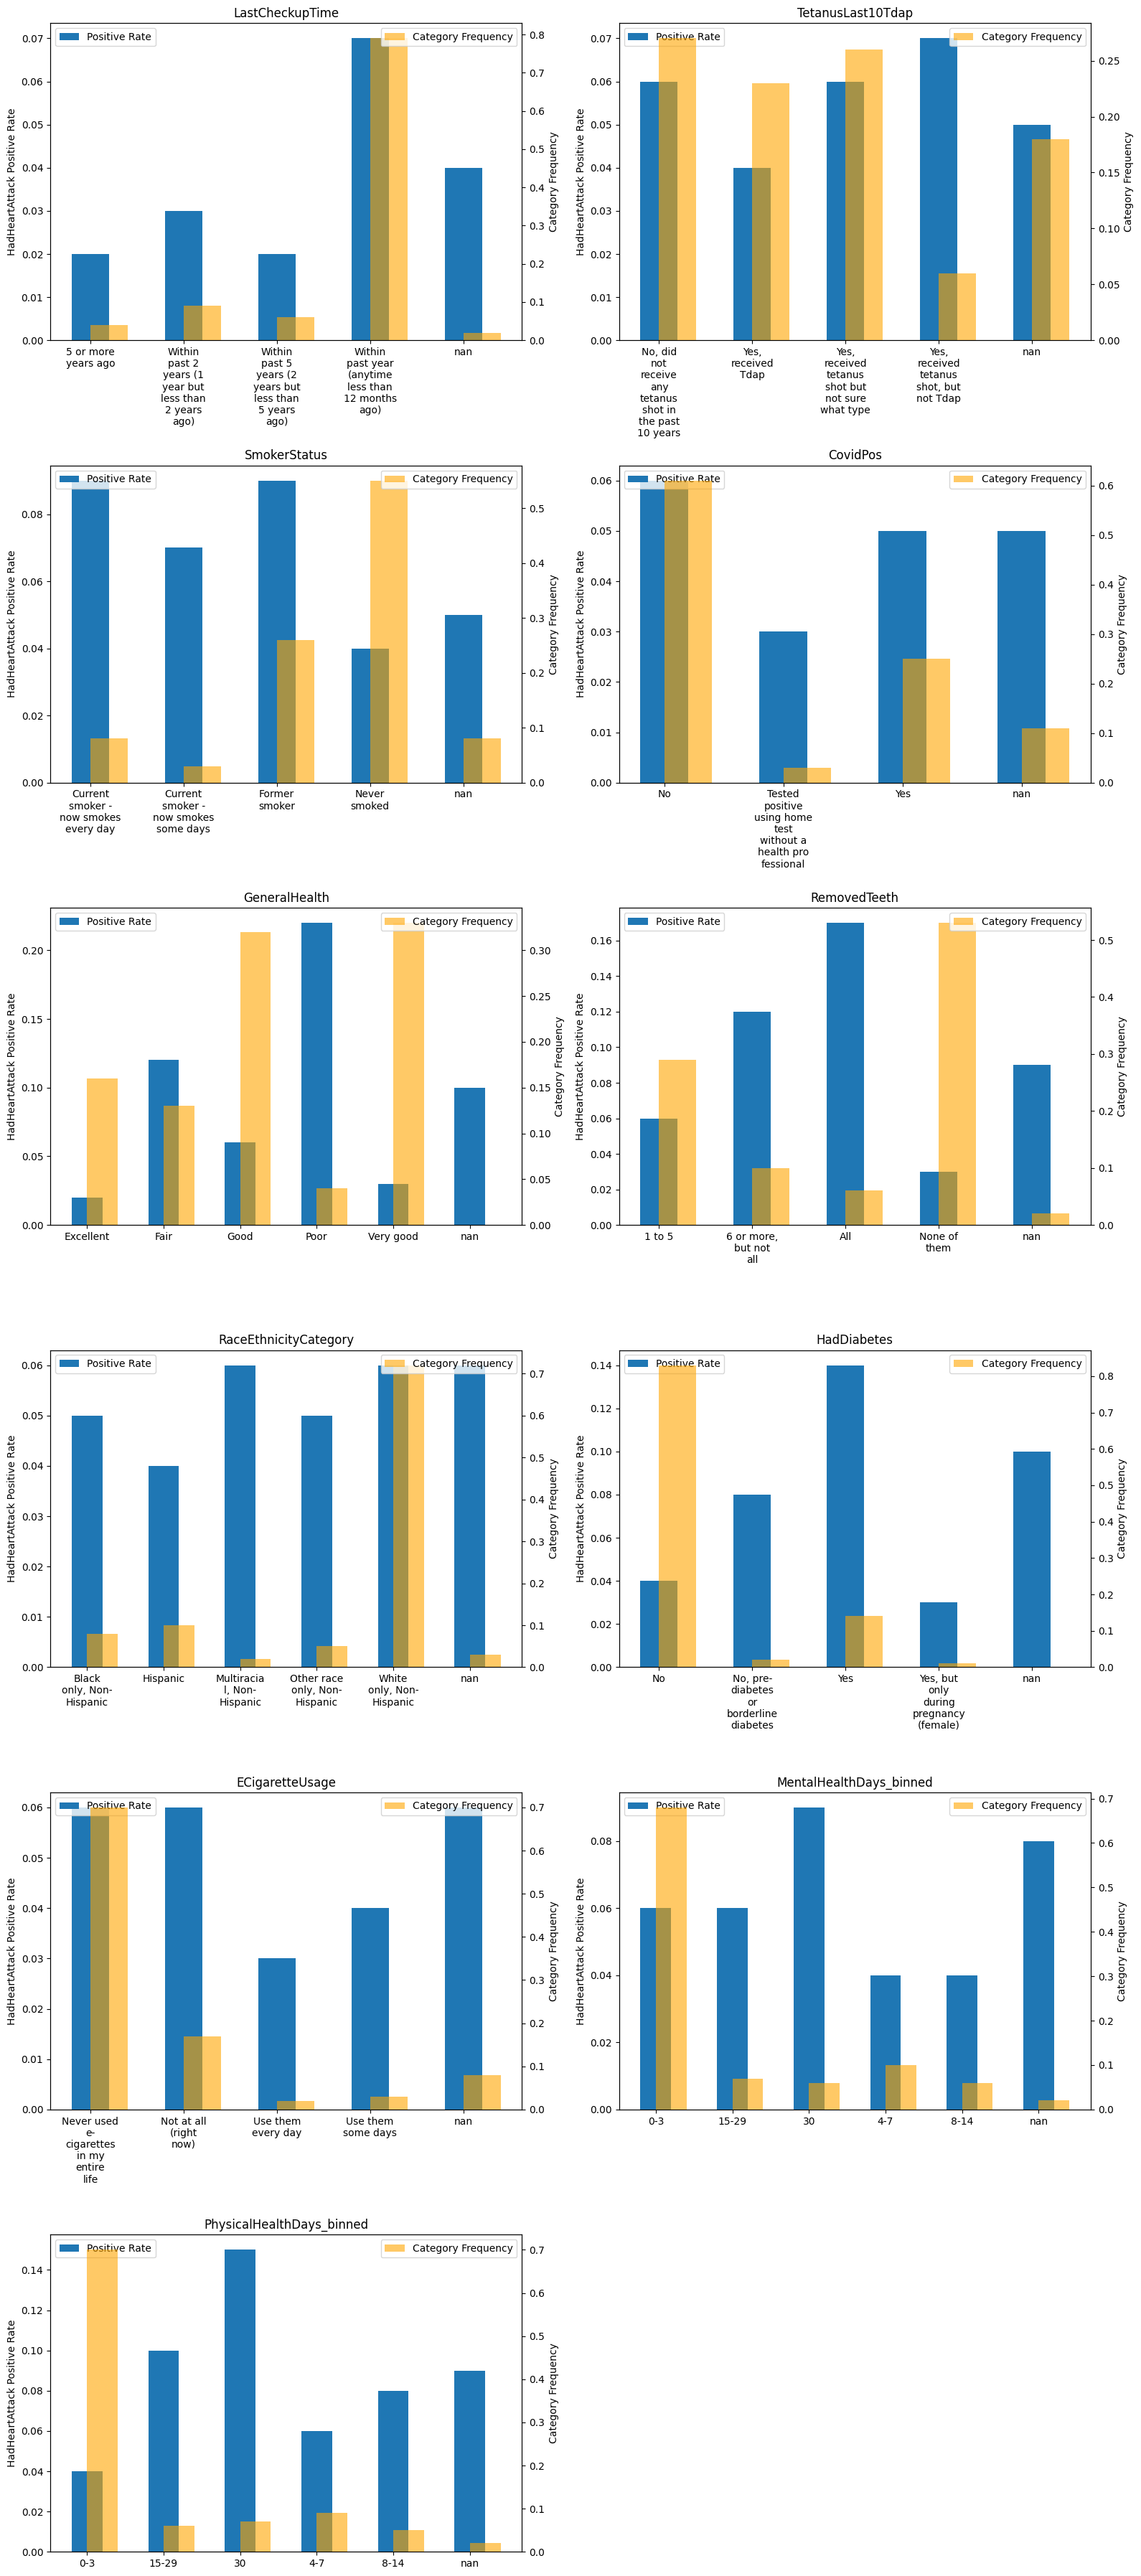

In [41]:
plot_cat_correlations(pd.concat([train_set[multiclass_features], mental_binned, physical_binned], axis=1), 2)

In [42]:
((train_set["AgeCategory"] == "18-24") & (train_set[target_feature] == "Yes")).sum() / (train_set["AgeCategory"] == "18-24").sum()

0.004626816843482731

Well, it seems I've stumbled upon a treasure trove of interesting insights!

1. The number of **removed teeth** has a strong positive correlation with the likelihood of a heart attack. This may be because this fact is closely related to age, or because [periodontal disease increases the risk of heart attacks.](https://www.webmd.com/heart-disease/features/periodontal-disease-heart-health)
2. There is no clear correlation between **race or ethnicity** and an increased likelihood of a heart attack. It seems that this feature should be removed, as it may contribute to an excessive contextual saturation related to the locations where respondents live.
3. **Age** has a very strong positive correlation with the risk of a heart attack. Interestingly, none of the respondents in the 18-24 age category had a heart attack! T**here is also a suspicion that most of the missing values belong to the 50-54 age category**. This could also explain the sharp drop in frequency for this age group.
  - I will take this into account during the imputation of missing values.
4. My suspicion regarding the leakage of information from the **GeneralHealth** feature is confirmed, specifically from the "Pure" and "Fair" classes. Of course, people after a heart attack will not say that their health is good.
5. The **LastCheckUp** feature does not appear to be informative. People who do not visit the doctor regularly have reasons for this — they feel healthy. If it’s for another reason, it’s highly likely they are not experiencing a heart attack or its consequences and thus cannot be part of the sample.
  - Therefore, **even if this fact is important, the data cannot capture this importance**.
6. For **Physical Health Days**, my suspicions about data leakage from this variable are confirmed. People experiencing physical difficulties for over a month have more than a 15% likelihood of a heart attack.
7. For **Mental Health Days**, the results are quite controversial. The proportion of heart attacks with prolonged mental health issues is higher than with short-term problems, but only by a few points.
  - It seems that the missing values are important and represent a MNAR case.
8. **ECigaretteUsage** requires further investigation. If it mainly indicates age, it may be worth considering its removal, as this could create unnecessary noise in the data.

My suspicions regarding leakage from **GeneralHealth** and **Physical Health Days** have been confirmed. The features **RaceEthnicityCategory** and **LastCheckupTime** should be removed.

In [19]:
train_set.drop(columns=["RaceEthnicityCategory", "LastCheckupTime"], inplace=True, axis=1)
test_set.drop(columns=["RaceEthnicityCategory", "LastCheckupTime"], inplace=True, axis=1)
multiclass_features.remove("RaceEthnicityCategory")
multiclass_features.remove("LastCheckupTime")

In [44]:
leaky_features.iloc[6, 1] += 1
leaky_features

Feature  Confidence                 Notes
0               PneumoVaxEver           1                      
1       HadDepressiveDisorder           0                      
2           DifficultyWalking           2                      
3   DifficultyDressingBathing           2                      
4            DifficutlyErrand           2                      
5            MentalHealthDays           0                      
6          PhysicalHealthDays           1                      
7               GeneralHealth           1                      
8                   ChestScan           1  Informative missings
9                   HadAngina           2                      
10                  HadStroke           2                      
11        DeadOrHardOfHearing           2                      
12    BlindOrVisionDifficulty           2                      
13            AlcoholDrinkers           1

### Num Features

I will convert the variable **AgeCategory** from categorical to numerical by replacing the intervals with their medians. This will allow for the creation of heatmaps and distributions using this variable.

In [20]:
age_mapping = {
        '80+': 82.5, 
        '75-79': 77,
        '70-74': 72,
        '65-69': 67,
        '60-64': 62,
        '55-59': 57,
        '50-54': 52,
        '45-49': 46.5,
        '40-44': 42,
        '35-39': 37,
        '30-34': 32,
        '25-29': 27,
        '18-24': 21,
    }

num_age_feature = train_set["AgeCategory"].map(age_mapping)
num_age_feature.name = "NumAgeCategory"

In [25]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def plot_num_correlations(df, num_features, target_feature, num_cols=3):
    num_series = df[num_features]
    if isinstance(num_series, pd.Series):
        num_series = num_series.to_frame(name=num_series.name)
        
    num_rows = len(num_series.columns) // num_cols + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 8, num_rows * 6), dpi=100)
    axes = axes.flatten()
    for i, col in enumerate(num_series.columns):
        ax = axes[i]
        sns.kdeplot(data=df, x=col, hue=target_feature, fill=True, common_norm=False, ax=ax)
        ax.set_title(f'{col} vs {target_feature}')
        ax.set_xlabel(col)
        ax.set_ylabel('Density')
        
    for i in range(len(num_series.columns), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

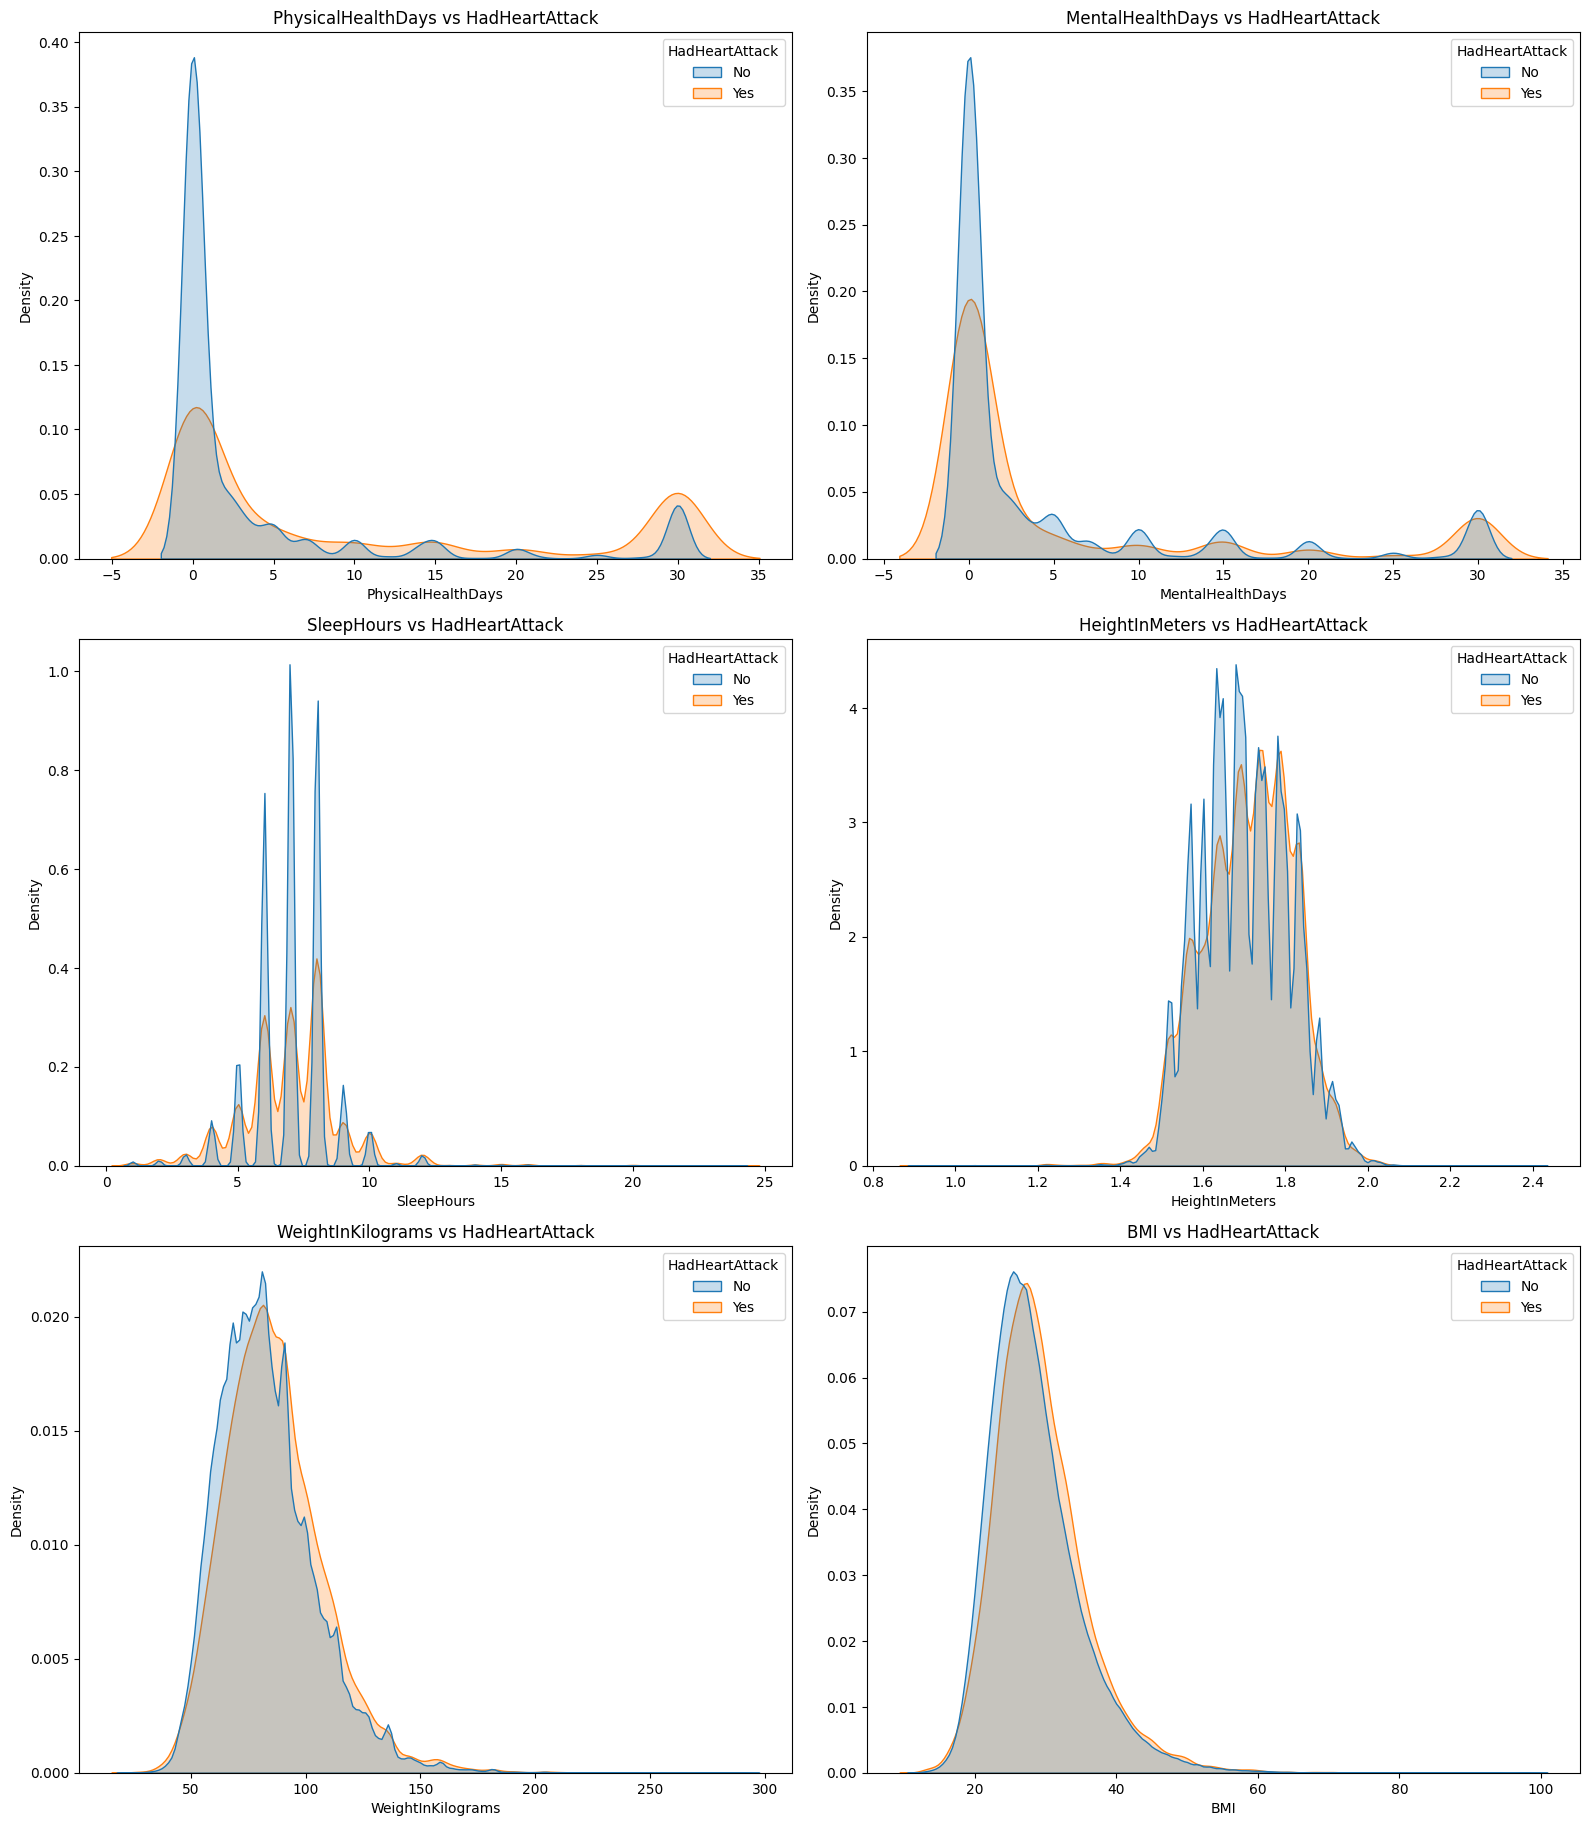

In [47]:
plot_num_correlations(train_set, num_features, target_feature, num_cols=2)

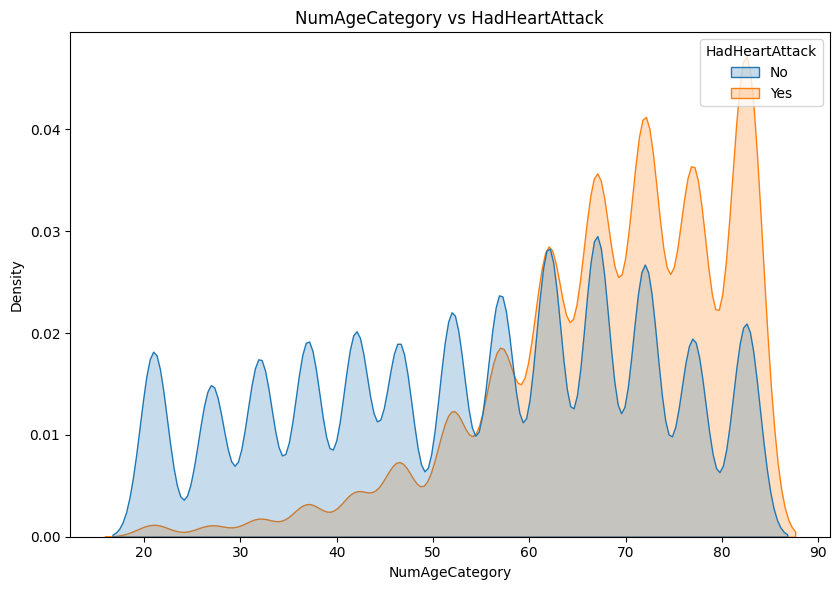

In [48]:
plot_num_correlations(pd.concat([train_set, num_age_feature] ,axis=1), "NumAgeCategory", target_feature )

Well, right now I can't draw any insights aside from the leakage from **PhysicalHealthDays**, which I've already identified earlier. The only thing worth noting here is the increased risk of heart attacks with an increase in **BMI**.

## Multivariate analysis

In [21]:
def combined_plot(df, features_list, target_feature, positive_class_label="Yes"):
    if len(features_list) != 2:
        raise ValueError("Features list should contain 2 features")
        
    feature1 = features_list[0]
    feature2 = features_list[1]

    df_grouped = df.groupby([feature1, feature2]).size().reset_index(name='count')
    df_grouped['proportion'] = df_grouped.groupby(feature1)['count'].transform(lambda x: x / x.sum())

    grouped_target = df.groupby([feature1, feature2])[target_feature].agg(
        positive_count=lambda x: (x == positive_class_label).sum(),
        total_count='count'
    ).reset_index()

    grouped_target['positive_ratio'] = grouped_target['positive_count'] / grouped_target['total_count']

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    def wrap_labels(labels, width):
        return [textwrap.fill(label, width) for label in labels]

    sns.barplot(x=feature1, y='proportion', hue=feature2, data=df_grouped, palette='Set2', ax=axes[0])
    axes[0].set_title(f'{feature2} over {feature1}')
    axes[0].set_ylabel(f'Proportion of {feature2}')
    axes[0].set_xlabel(feature1)
    axes[0].tick_params(axis='x')
    
    # Split long labels into rows
    labels1 = wrap_labels(df_grouped[feature1].unique(), 15)
    axes[0].set_xticklabels(labels1)

    sns.barplot(x=feature1, y='positive_ratio', hue=feature2, data=grouped_target, palette='Set2', ax=axes[1])
    axes[1].set_title(f'Proportion of {target_feature} in dependence on {feature1} and {feature2}')
    axes[1].set_ylabel(f'Proportion of {target_feature}')
    axes[1].set_xlabel(feature1)
    axes[1].tick_params(axis='x')

    labels2 = wrap_labels(grouped_target[feature1].unique(), 15)
    axes[1].set_xticklabels(labels2)
    
    # Unite legends
    axes[0].get_legend().remove()
    axes[1].get_legend().remove()
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)

    plt.tight_layout()
    plt.show()

In [50]:
((train_set["AgeCategory"] == "18-24") & (train_set[target_feature] == "Yes")).sum()

99

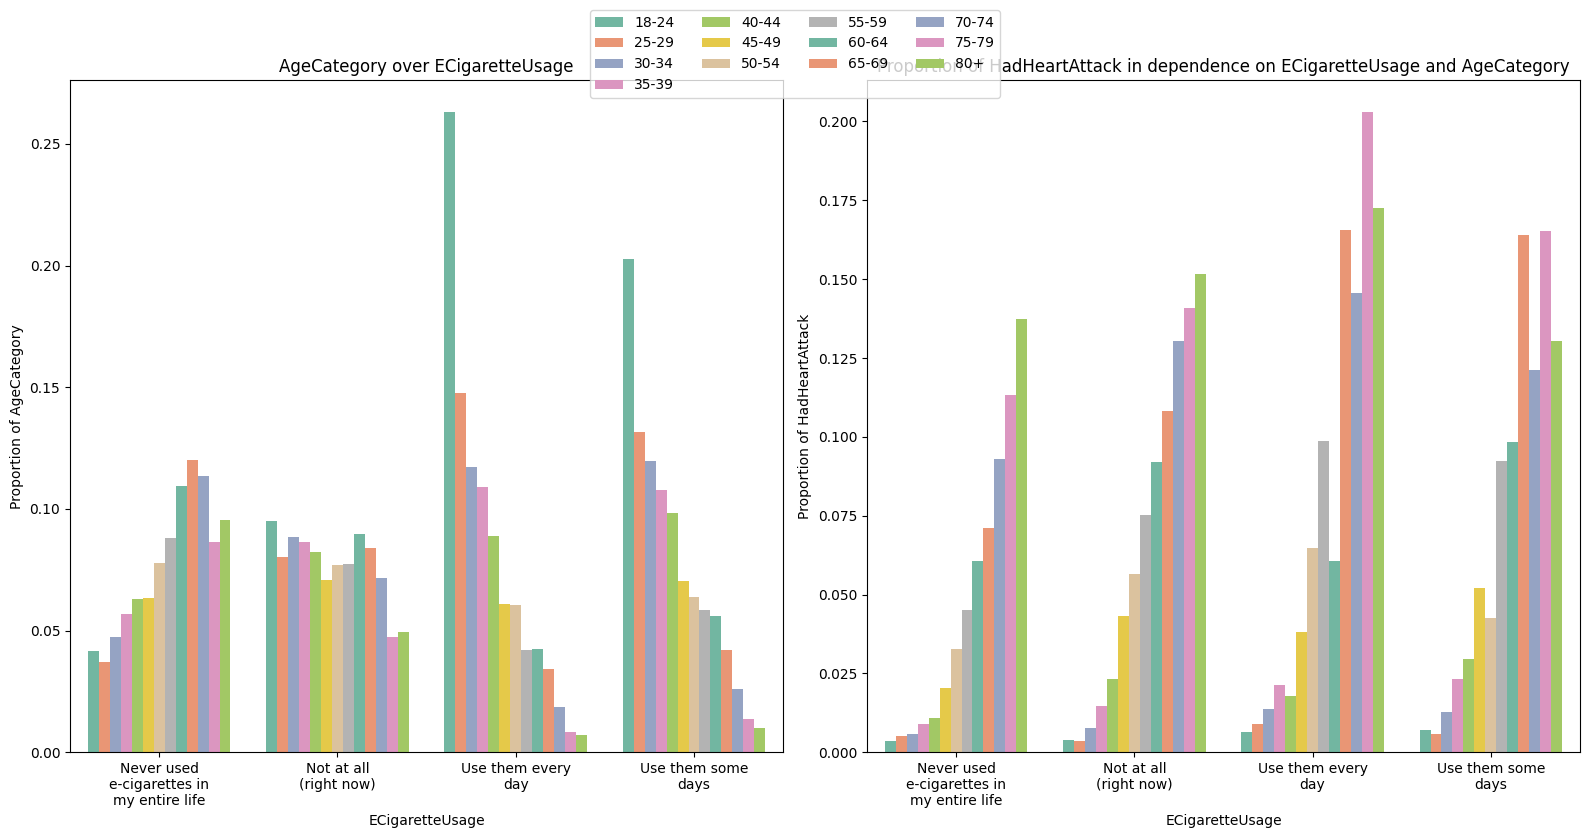

In [51]:
combined_plot(train_set, ["ECigaretteUsage", "AgeCategory"], target_feature)

All attention on class "Use them every day" in both plots. It seems that e-cigarette users are not only people aged 18 to 25. This gives hope for the informativeness of the **ECigaretteUsage** feature.

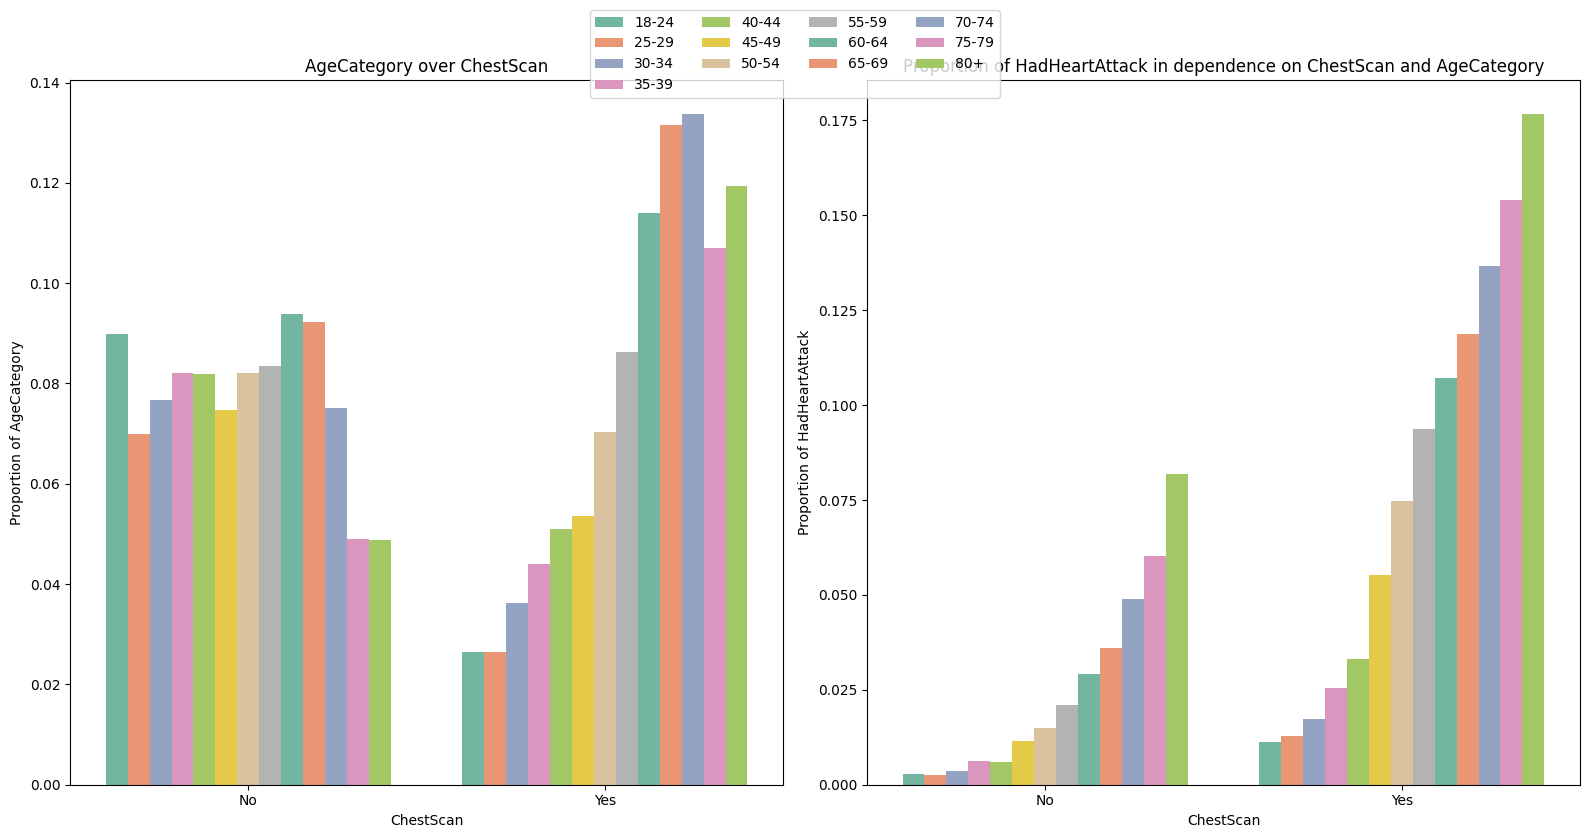

In [52]:
combined_plot(train_set, ["ChestScan", "AgeCategory"], target_feature)

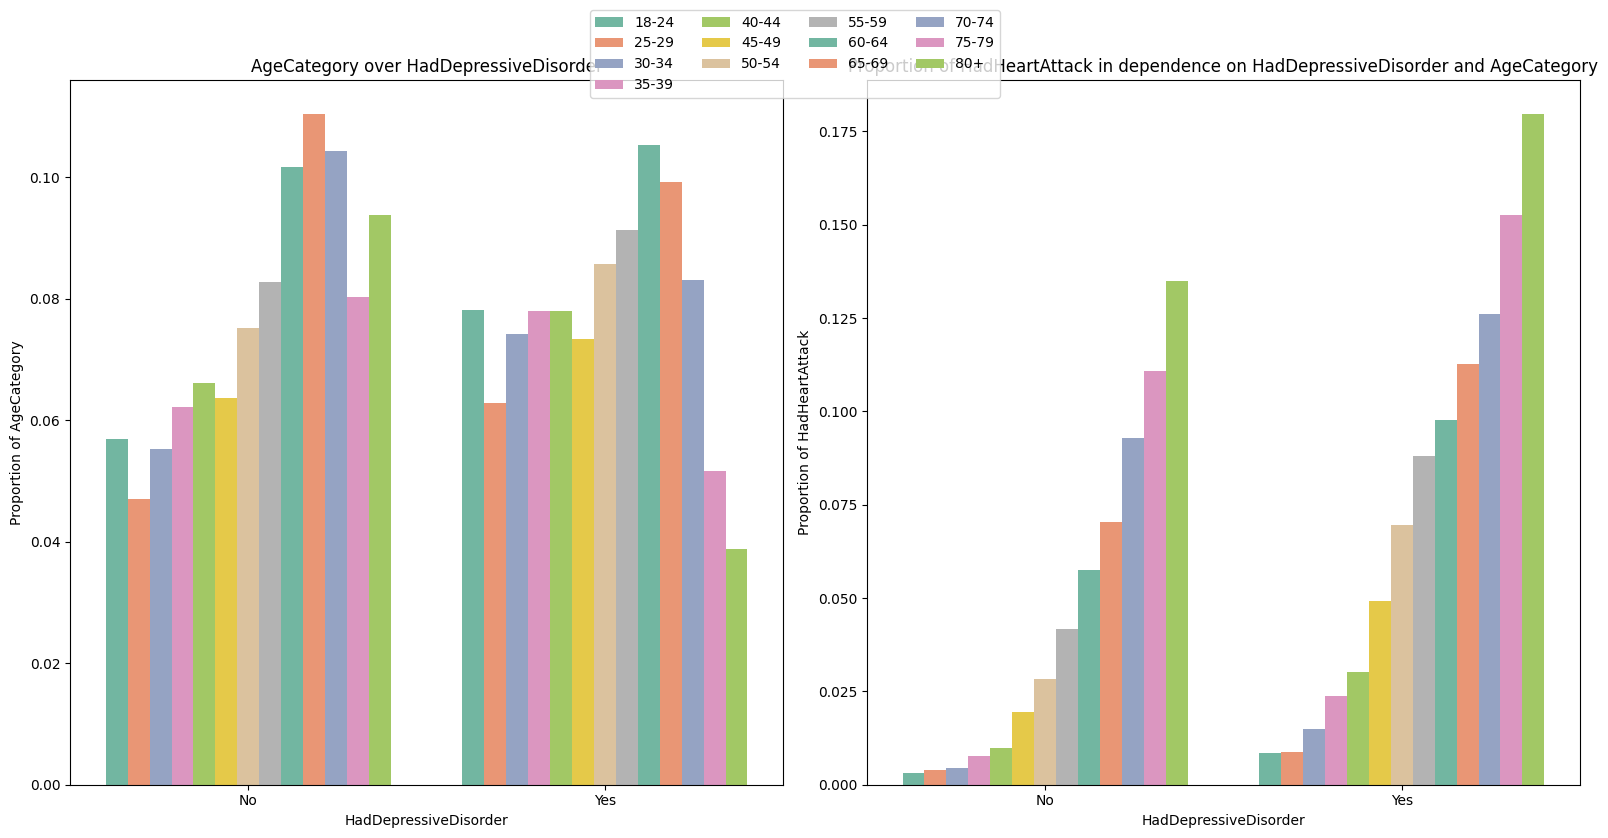

In [53]:
combined_plot(train_set, ["HadDepressiveDisorder", "AgeCategory"], target_feature)

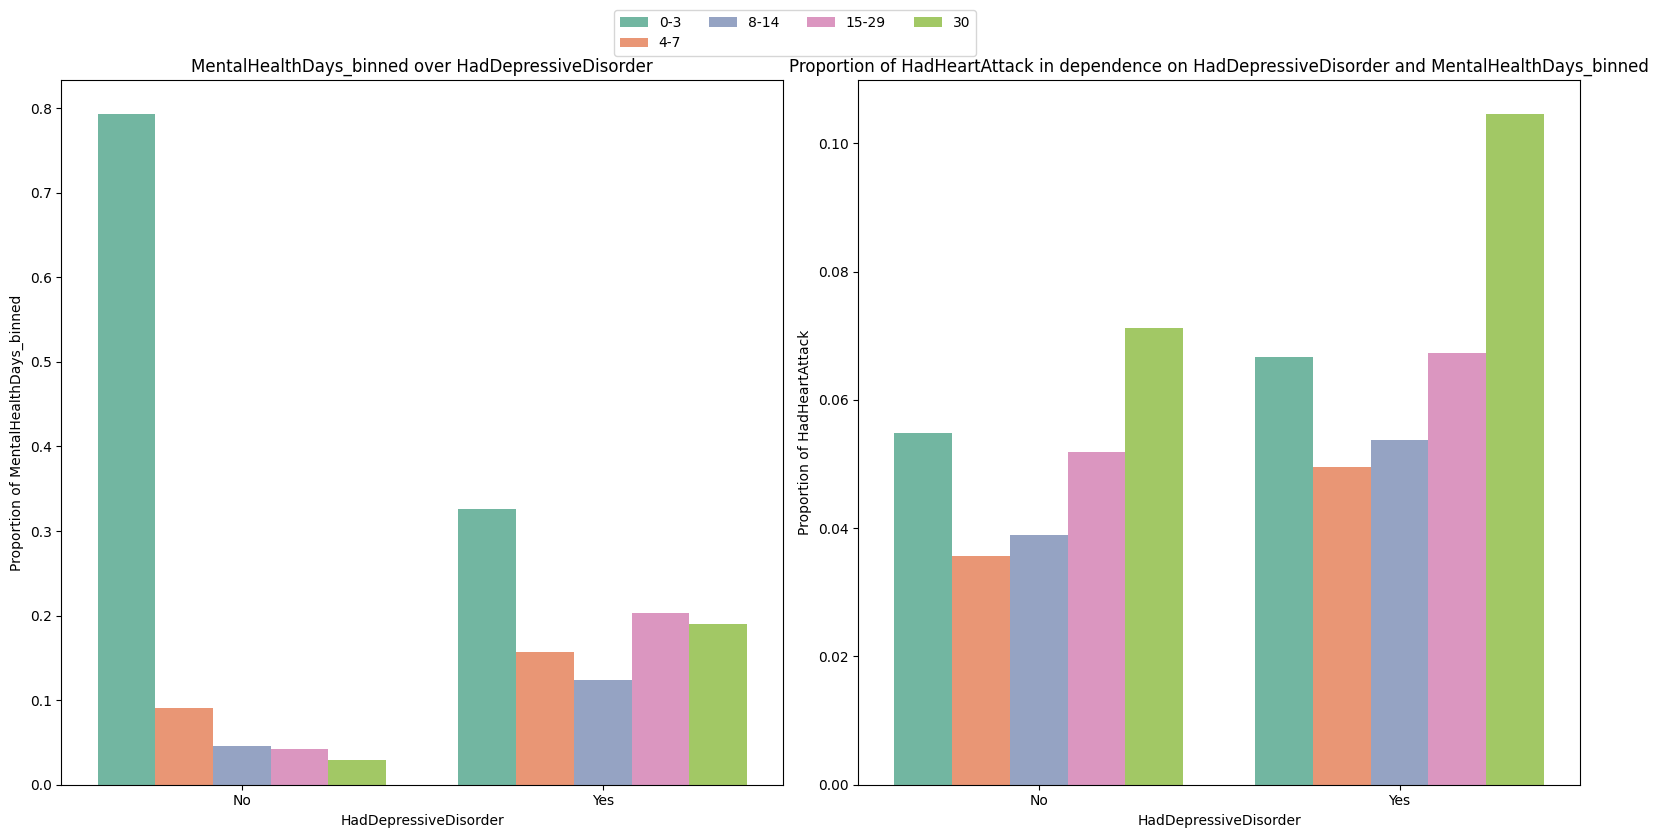

In [54]:
combined_plot(pd.concat([train_set, mental_binned], axis=1), ["HadDepressiveDisorder", "MentalHealthDays_binned"], target_feature)

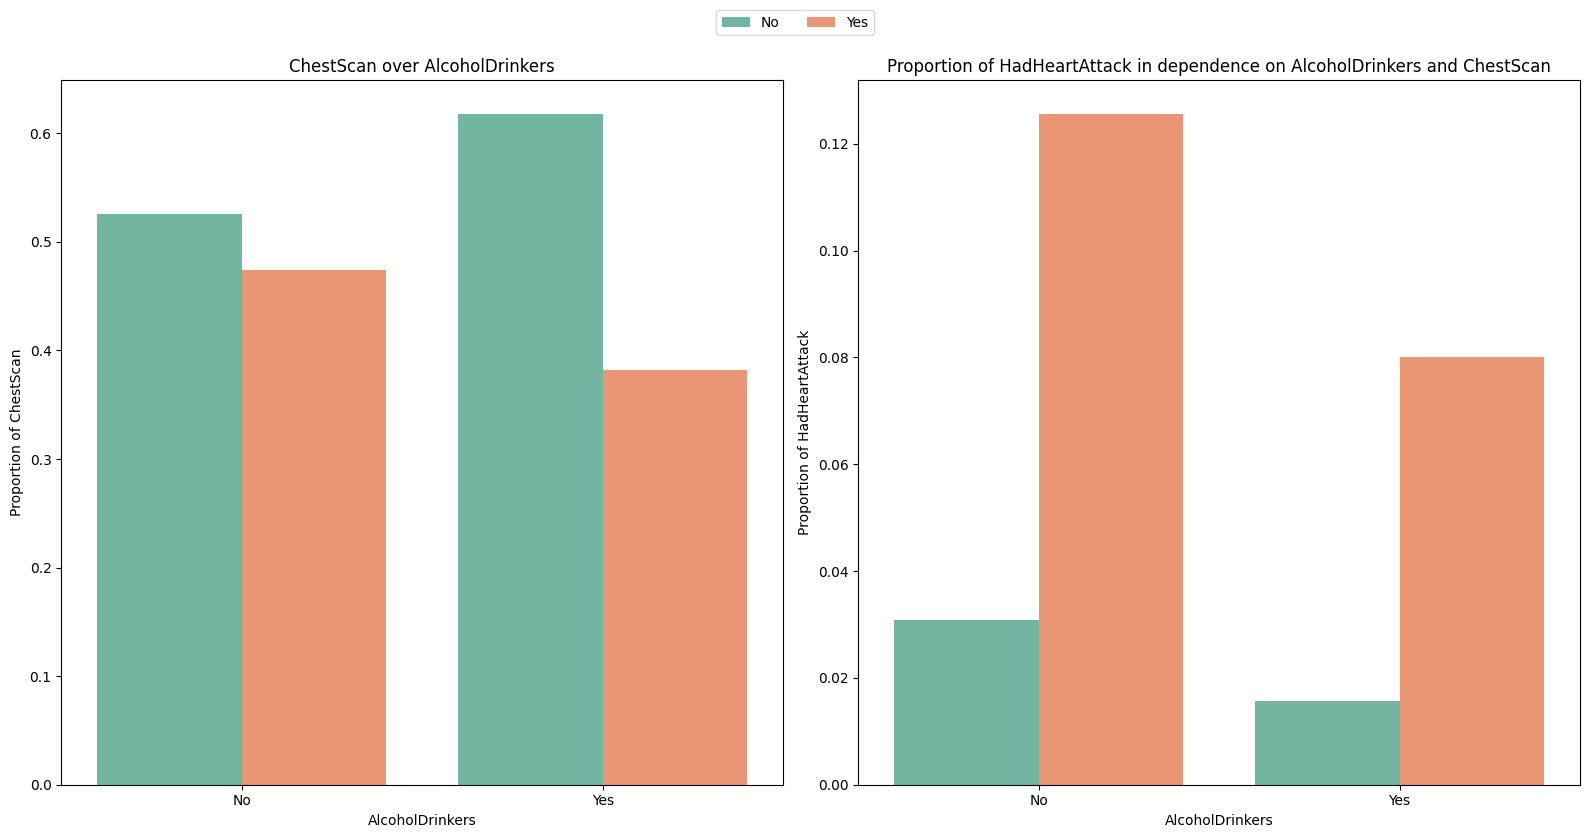

In [55]:
combined_plot(train_set, ["AlcoholDrinkers", "ChestScan"], target_feature)

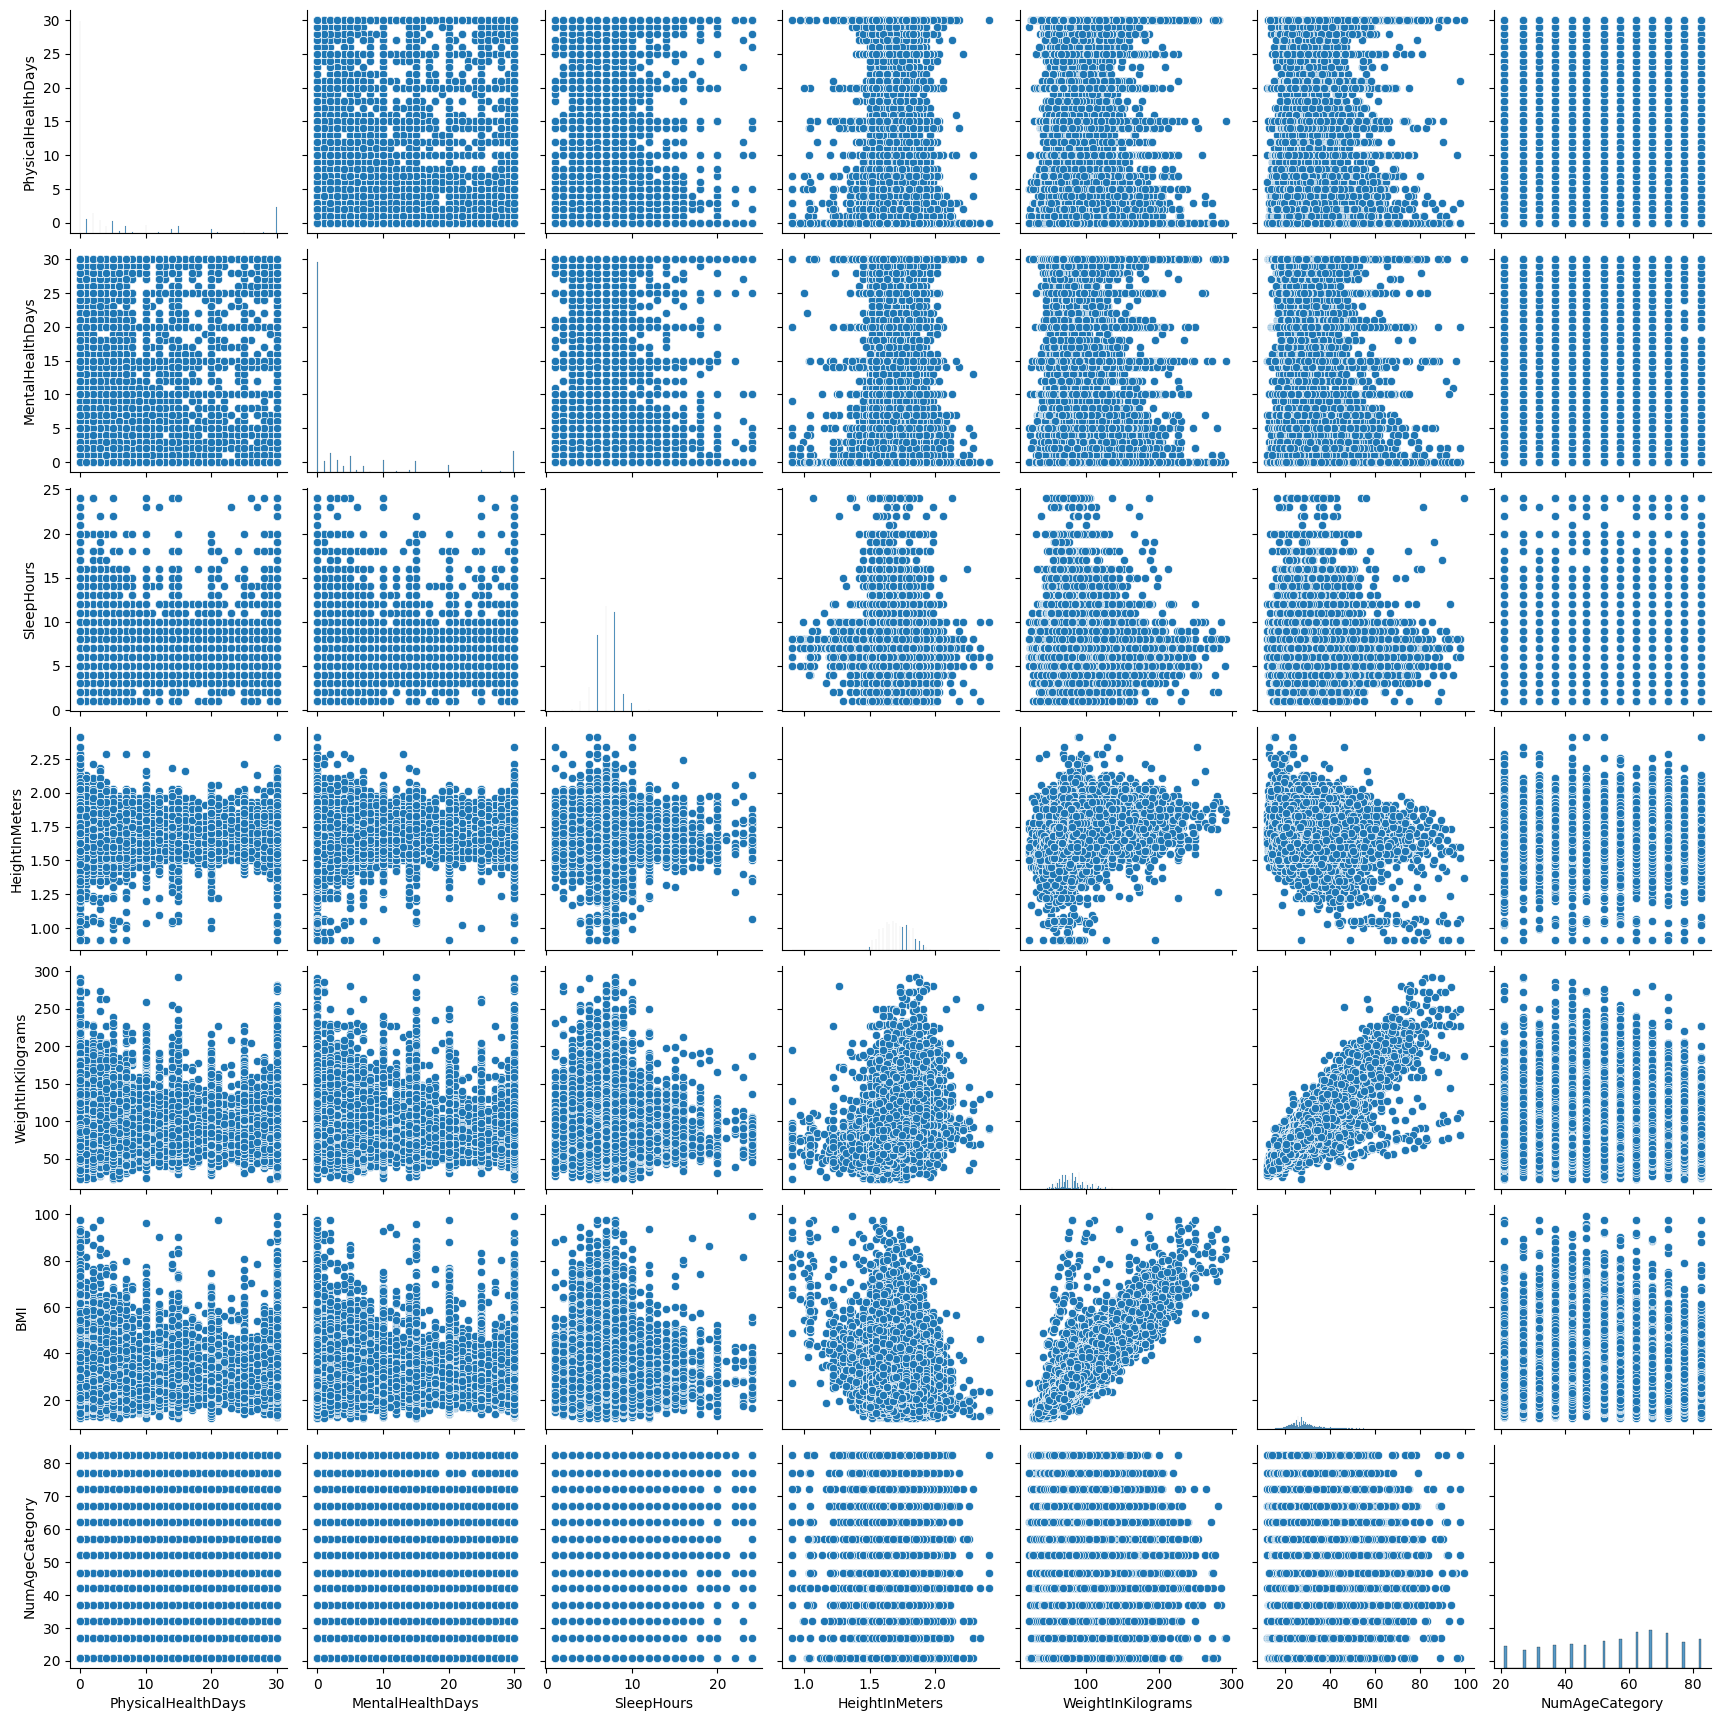

In [56]:
sns.pairplot(pd.concat([train_set[num_features], num_age_feature], axis=1))

## Detecting anomalies with statistical tests

### Continuous anomalies analysis

In [57]:
import scipy.stats as st

def calc_confidence_interval(series, confidence_level=0.95):
    mean = series.mean()
    n = series.shape[0]
    std_dev = series.std(ddof=1)
    
    z_stat = st.norm.ppf((confidence_level + 1) / 2)
    lower_bound = mean - z_stat * std_dev
    upper_bound = mean + z_stat * std_dev
    return (lower_bound, upper_bound)


anomalies_table = pd.DataFrame({"Feature": num_features, "Anomalies": "", "Confidence interval":""}).set_index("Feature")
for feature in num_features:
    col = train_set[feature]
    confidence_interval = calc_confidence_interval(col, 0.99)
    anomalies_amount = ((col < confidence_interval[0]) | (col > confidence_interval[1])).sum()
    
    anomalies_table.loc[feature, "Anomalies"] = f"{round(anomalies_amount / train_set.shape[0] * 100, 2)}%"
    anomalies_table.loc[feature, "Confidence interval"] = f"from {round(confidence_interval[0], 2)} to {round(confidence_interval[1], 2)}"
    
anomalies_table

Anomalies   Confidence interval
Feature                                           
PhysicalHealthDays     7.69%   from -18.0 to 26.66
MentalHealthDays       6.44%  from -17.21 to 25.97
SleepHours             2.49%    from 3.17 to 10.88
HeightInMeters         0.64%     from 1.43 to 1.98
WeightInKilograms      1.43%  from 27.81 to 138.37
BMI                    1.87%   from 11.63 to 45.44

As a result of the binomial distribution in **Mental** and **Physical Health Days**, we got nonsense, which was expected.

What is unexpected is that there are 2.5% of people sleeping less than 3 or more than 10 hours a day, especially those sleeping less than 3 hours. I won't delete these records for now, but I will take them into account in further analysis.

In [58]:
train_set[train_set["SleepHours"] < 3.17].shape[0]

4659

I am also curious if we have records where **BMI** is present, but one of the characteristics needed to calculate it is missing. If so, how were these values calculated? Most likely, these are anomalies."



In [59]:
anomaly_BMI = [
    missing_combinations[(missing_combinations["BMI"] == False) & (missing_combinations["HeightInMeters"] == True)],
    missing_combinations[(missing_combinations["BMI"] == False) & (missing_combinations["WeightInKilograms"] == True)]
]
print(f"Missing Height: {not anomaly_BMI[0].empty}\nMissing Weight: {not anomaly_BMI[1].empty}")

Missing Height: False
Missing Weight: False


# Baseline performance
To assess the effectiveness of further steps, I need a baseline model quality without any prior processing or tuning. I will use LightGBM as the baseline model. It is currently one of the fastest ensemble methods that does not apply specific methods for handling variables or their missing values. For this reason, I will train this model on clean data, after performing basic encoding.

Although LightGBM does not require variable encoding, other models I may test later do. Consistent preprocessing will also help maintain consistency between results on the complete dataset and its clean subset.

## Feauture encoding

The pipeline created during this process will be applied in the future. In the future, after engineering new features, we will simply be able to expand the feature spaces of each transformer. Of course, this will then require cleaning the entire preprocessing transformer.

In [28]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
import numpy as np

AGE_MAPPING = {
        '80+': 82.5, 
        '75-79': 77,
        '70-74': 72,
        '65-69': 67,
        '60-64': 62,
        '55-59': 57,
        '50-54': 52,
        '45-49': 46.5,
        '40-44': 42,
        '35-39': 37,
        '30-34': 32,
        '25-29': 27,
        '18-24': 21,
    }


BINS_DICT = {
    "MentalHealthDays": [0, 3, 7, 14, 29, float("inf")],
    "PhysicalHealthDays": [0, 3, 7, 14, 29, float("inf")]
}

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.freqs_ = {}
        for col in X.columns:
            freqs = X[col].value_counts(normalize=True)
            self.freqs_[col] = freqs
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        X_transformed = X.copy()
        for col in X.columns:
            X_transformed[col] = X[col].map(self.freqs_[col]).fillna(0)
        return X_transformed

    def get_feature_names_out(self, input_features=None):
        return input_features
    
class NamedFunctionTransformer(FunctionTransformer):
    def get_feature_names_out(self, input_features=None):
        return input_features
    
class CustomBinner(BaseEstimator, TransformerMixin):
    def __init__(self, bins_dict=None, features=None, n_bins=4):
        self.bins_dict = bins_dict if bins_dict else {}
        self.features = features if features else []
        self.n_bins = n_bins

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()

        for feature in self.features:
            missing_mask = X[feature].isnull()

            if feature in self.bins_dict:
                bins = self.bins_dict[feature]
                X_transformed.loc[~missing_mask, feature] = np.digitize(X.loc[~missing_mask, feature], bins=bins, right=False)
            else:
                est = KBinsDiscretizer(n_bins=self.n_bins, encode='ordinal', strategy='quantile')
                X_transformed.loc[~missing_mask, feature] = est.fit_transform(X.loc[~missing_mask, [feature]]).flatten()

        return X_transformed
    
    def get_feature_names_out(self, input_features=None):
                return self.features
    
class CustomOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mappings):
        self.mappings = mappings

    def fit(self, X, y=None):
        self.mappings = {key:value for key, value in self.mappings.items() if key in X.columns.to_list()}
        self.inverse_mappings = {col: {v: k for k, v in mapping.items()} for col, mapping in self.mappings.items()}

        return self 

    def transform(self, X):
        X_transformed = X.copy()
        for col, mapping in self.mappings.items():
            X_transformed[col] = X_transformed[col].map(mapping)
        return X_transformed

    def inverse_transform(self, X):
        X_inverse = X.copy()
        for col, inverse_mapping in self.inverse_mappings.items():
            X_inverse[col] = X_inverse[col].map(inverse_mapping)
        return X_inverse
    def get_feature_names_out(self, input_features=None):
        return input_features if input_features is not None else list(self.mappings.keys())

# converts the output NumPy array (of preprocessing) into a dataframe, assigning it the feature names
class DFConverter(BaseEstimator, TransformerMixin):
    def __init__(self, transformer):
        self.transformer = transformer

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        features_names = self.transformer.get_feature_names_out()
        df = pd.DataFrame(data=X, columns=features_names)
        # converts features names to json format
        df.columns = df.columns.str.replace(r'[^\w]+', '_', regex=True)
        return df


def create_preprocessor(**kwargs):
    kwargs.setdefault("bins_num", 4)
    kwargs.setdefault("remainder", False)

    # Num features transformations
    log_transformer = NamedFunctionTransformer(np.log, inverse_func=np.exp)
    continous_pipe = Pipeline([
        ("log_transform", log_transformer),
        ("standartization", StandardScaler())
    ])
    


    binning_transformer = CustomBinner(bins_dict=BINS_DICT, 
                                       features=kwargs["binning_features"], 
                                       n_bins=kwargs["bins_num"])



    num_transformer = ColumnTransformer([
        ("continuous", continous_pipe, kwargs["continuous_features"]),
        ("binned", binning_transformer, kwargs["binning_features"]),
    ], remainder="passthrough")

    # Categorical features transformations

    mappings = {
        "GeneralHealth": {
            'Poor': 0,
            'Fair': 1, 
            'Good': 2, 
            'Very good': 3,  
            'Excellent': 4,
        },
        "AgeCategory": AGE_MAPPING, # created on the start of bivariate analysis in num section,
        "RemovedTeeth": {
            'None of them': 0,
            '1 to 5': 1,
            '6 or more, but not all': 2,
            'All': 3
        }
    }
    remainder = kwargs["remainder"]
    if remainder == "ordinal":
        remainder_enc = OrdinalEncoder()
    elif remainder == "frequency":
        remainder_enc = FrequencyEncoder()
    else:
        remainder_enc = "passthrough"

    custom_ordinal = CustomOrdinalEncoder(mappings)
    num_features =  kwargs["continuous_features"] +  kwargs["binning_features"]
    
    preprocessing = ColumnTransformer([
        ("ordinal_enc", custom_ordinal,  kwargs["ordinal_features"]),
        ("onehot_enc", OneHotEncoder(handle_unknown="ignore", sparse_output=False),  kwargs["onehot_features"]),
        ("num", num_transformer, num_features)
    ], remainder=remainder_enc)

    preprocessing_pipe = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("to_dataframe", DFConverter(preprocessing))
    ])
    
    return preprocessing_pipe

In [29]:
from utils.feature_encoding import create_preprocessor

continuous_features = ["BMI", "SleepHours", "HeightInMeters", "WeightInKilograms"]
binning_features = ["MentalHealthDays", "PhysicalHealthDays"]
cat_features = train_set.select_dtypes(include=[object]).columns.to_list() # update after removing few features
ordinal_features = ["AgeCategory", "RemovedTeeth", "GeneralHealth"]
onehot_features = list(set(cat_features) - set(ordinal_features) - set([target_feature]))

preprocessor = create_preprocessor(continuous_features=continuous_features, 
                                   binning_features=binning_features,
                                   ordinal_features=ordinal_features, 
                                   onehot_features=onehot_features)

## Train the model

In [30]:
import lightgbm as lgb
from utils.utils import evaluate_model

clean_train_set = train_set.dropna()
X_train_clean, y_train_clean = clean_train_set.drop(columns=[target_feature]), clean_train_set[target_feature]

X_clean_encoded = preprocessor.fit_transform(X_train_clean)
y_clean_encoded = y_train_clean.map({"Yes": 1, "No": 0})

baseline_scores = evaluate_model(lgb.LGBMClassifier(random_state=42, verbose=-1), X_clean_encoded, 
                                 y_clean_encoded, model_name="Basic_lgb")
baseline_scores

d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Ml_Projects\HeartAttackPrediction\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0  Basic_lgb        0.952508       0.948894         0.942869        0.936601   

   Train Recall  Test Recall  Train F1   Test F1  Train Roc_auc  Test Roc_auc  
0      0.952508     0.948894   0.94274  0.938361       0.916756      0.890411

Creating a dataframe to compare future models

In [31]:
from utils.utils import append_comparison_table

models_comparison = append_comparison_table(baseline_scores)
models_comparison

Model  Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0  Basic_lgb        0.952508       0.948894         0.942869        0.936601   

   Train Recall  Test Recall  Train F1   Test F1  Train Roc_auc  Test Roc_auc  
0      0.952508     0.948894   0.94274  0.938361       0.916756      0.890411

It seems that the model generalized the data quite well even with standard parameters. There is a slight overfitting, but it is within a few points (the difference in AUC).

In any case, it can already be said that the model suspiciously generalizes well. Over 94% for almost all metrics. And this is without feature engineering, training on the full dataset, or model tuning. 

**The baseline model’s accuracy is suspiciously high, isn’t it?**

# Delete Leaky variables

To definitively confirm my suspicions regarding leaking features, I will perform two rounds of independent feature importance checks:

1. Collinearity check using **Cramér's V statistical test**. This will help determine not only the presence of feature associations but also their strength. Values greater than 0.7 are considered very high and could potentially indicate leaking features.
2. Multicollinearity check using **LightGBM**. This will allow me to identify the presence of nonlinear associations between independent features and the target variable.

Thus, I will conduct a comprehensive (I hope) analysis of each independent feature regarding its relationship with the target feature.

In [82]:
leaky_features

Feature  Confidence                 Notes
0               PneumoVaxEver           1                      
1       HadDepressiveDisorder           0                      
2           DifficultyWalking           2                      
3   DifficultyDressingBathing           2                      
4            DifficutlyErrand           2                      
5            MentalHealthDays           0                      
6          PhysicalHealthDays           1                      
7               GeneralHealth           1                      
8                   ChestScan           1  Informative missings
9                   HadAngina           2                      
10                  HadStroke           2                      
11        DeadOrHardOfHearing           2                      
12    BlindOrVisionDifficulty           2                      
13            AlcoholDrinkers           1

## Cramér's V test

In [65]:
from scipy.stats import chi2_contingency


def cramers_v(confusion_matrix):
    chi2_stat, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum()
    return np.sqrt(chi2_stat / (n * (min(confusion_matrix.shape) - 1)))

def cramers_v_feature_importance(df, categorical_features, target_feature):
    results = []
    for feature in categorical_features:
        confusion_matrix = pd.crosstab(df[feature], df[target_feature])
        cramers_v_value = cramers_v(confusion_matrix)
        results.append({'Feature': feature, 'Yes': cramers_v_value.iloc[0], "No": cramers_v_value.iloc[1]})

    cramers_v_df = pd.DataFrame(results)

    return cramers_v_df

cramers_v_results = cramers_v_feature_importance(pd.concat([train_set, mental_binned, physical_binned], axis=1),
                                                           cat_features, target_feature)
cramers_v_results.sort_values(by=["Yes"], ascending=False)

Feature       Yes        No
4              HadHeartAttack  1.029641  4.195952
5                   HadAngina  0.456389  1.901779
1               GeneralHealth  0.211974  0.864756
6                   HadStroke  0.194840  0.796120
23                AgeCategory  0.191411  0.777490
3                RemovedTeeth  0.183181  0.753040
22                  ChestScan  0.179188  0.730250
17          DifficultyWalking  0.173143  0.703768
13                HadDiabetes  0.156236  0.637179
9                     HadCOPD  0.149515  0.610686
12               HadArthritis  0.129560  0.528299
27              PneumoVaxEver  0.122226  0.487156
11           HadKidneyDisease  0.120147  0.490910
14        DeafOrHardOfHearing  0.108112  0.439838
20               SmokerStatus  0.104208  0.423734
19          DifficultyErrands  0.100129  0.406819
18  DifficultyDressingBathing  0.095045  0.386001
2          PhysicalActivities  0.088612  0.361371
15    BlindOrVisionDifficulty  0.082797  0.336671
24            AlcoholDrinkers  0.078113  0.317621
0                         Sex  0.072245  0.294412
16    DifficultyConcentrating  0.056967  0.231755
8               HadSkinCancer  0.053778  0.219839
26               FluVaxLast12  0.048144  0.195669
28          TetanusLast10Tdap  0.046134  0.186746
10      HadDepressiveDisorder  0.031857  0.129924
30                   CovidPos  0.030627  0.124384
7                   HadAsthma  0.029265  0.119325
29           HighRiskLastYear  0.022981  0.093436
21            ECigaretteUsage  0.021739  0.088545
25                 HIVTesting  0.016023  0.065618

Well, some of the variables I suspected have shown indeed high correlation, but mostly only with the negative class of the target variable. This can be partly explained by the significant class imbalance in the target variable, with a skew of 9 to 1 in favor of the negative class.

So far, there is still insufficient evidence to remove the leaking variables. It is also necessary to conduct feature importance checks using LightGBM.

## LightGBM feature importance

In [31]:
from utils.utils import get_feature_importances

feature_importances = get_feature_importances(lgb.LightGBM(random_seed=42, verbose=-1), X_clean_encoded, y_clean_encoded)
feature_importances.head(10)

Feature  Importance
0                num__continuous__BMI       336.2
1  num__continuous__WeightInKilograms       296.2
2            ordinal_enc__AgeCategory       274.0
3         num__continuous__SleepHours       192.0
4     num__continuous__HeightInMeters       181.4
5          ordinal_enc__GeneralHealth       152.8
6           ordinal_enc__RemovedTeeth       115.0
7            onehot_enc__HadStroke_No       100.0
8              onehot_enc__Sex_Female        98.4
9     num__binned__PhysicalHealthDays        66.8

It seems that some suspicions have indeed been confirmed, though not all:
1. **HadAngina**: A very high Cramér’s V (1.9) for "No" indicates that this variable may be leaking data. LightGBM importance (66) is not a very high indicator, but nonetheless, it ranks as the 11th most important feature (out of 72).
2. **HadStroke**: A very high Cramér’s V (0.8) for "No". LightGBM importance (100) is also quite high, ranking as the 8th most important variable (out of 72).
3. **GeneralHealth**: A very high Cramér’s V (0.86) for "No". LightGBM importance (152) is also quite high, ranking as the 6th most important variable (out of 72).
4. **PhysicalHealthDays**: A fairly low Cramér’s V. However, it has a relatively high LightGBM importance (67), ranking as the 10th most important feature (out of 72).
5. **DifficultyWalking**: A high Cramér’s V (0.7) for "No". Moderately high LightGBM importance (40), ranking as the 17th most important feature (out of 72).

## Features deletion

In [33]:
features_to_remove = ["HadAngina", "HadStroke", "GeneralHealth",
                     "PhysicalHealthDays", "DifficultyWalking"]
train_set, test_set = train_set.drop(columns=features_to_remove), test_set.drop(columns=features_to_remove)
binning_features = [item for item in binning_features if item not in features_to_remove]
ordinal_features = [item for item in ordinal_features if item not in features_to_remove]
onehot_features = [item for item in onehot_features if item not in features_to_remove]

I do not rule out that these features could be good predictors. However, I have gathered enough evidence to justify believing that they are also consequences of a heart attack.

Therefore, to eliminate the possibility of leakage, I will remove these features from the dataset. While this will increase the model's bias, it will significantly reduce the likelihood of data leakage.

## Baseline model performance evaluation

In [33]:
preprocessor = create_preprocessor(binning_features=binning_features, ordinal_features=ordinal_features,
                                  onehot_features=onehot_features, continuous_features=continuous_features)

clean_train_set = train_set.dropna()
X_train_clean, y_train_clean = clean_train_set.drop(columns=[target_feature]), clean_train_set[target_feature]

X_clean_encoded = preprocessor.fit_transform(X_train_clean)
y_clean_encoded = y_train_clean.map({"Yes": 1, "No": 0})

no_leaky_scores = evaluate_model(lgb.LGBMClassifier(random_seed=42, verbose=-1), X_clean_encoded, 
                                      y_clean_encoded, model_name="Lgb_no_leaky")

In [34]:
models_comparison = append_comparison_table(no_leaky_scores, models_comparison)

models_comparison

Model  Train Accuracy  Test Accuracy  Train Precision  \
0     Basic_lgb        0.952508       0.948894         0.942869   
1  Lgb_no_leaky        0.943489       0.942716         0.938825   

   Test Precision  Train Recall  Test Recall  Train F1   Test F1  \
0        0.936601      0.952508     0.948894   0.94274  0.938361   
1        0.917505      0.943489     0.942716   0.91705  0.915806   

   Train Roc_auc  Test Roc_auc  
0       0.916756      0.890411  
1       0.863864      0.829128

Most metrics experienced a slight deterioration or remained the same. However, the AUC metric noticeably decreased, by 5 points on the training set and by 6 on the test set. The model has become worse at distinguishing between classes.

Nevertheless, the drop in accuracy is not dramatic; the reduction in the likelihood of data leakage came at a relatively small cost.

In [34]:
preprocessed_data = pd.concat([train_set, test_set], axis=0)
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

# Imputation

Well, there is quite a significant problem with imputation, due to three previously explored facts:

1. Most missing values are MAR (Missing At Random) - which typically require non-linear models for imputation.
2. Most continuous variables are extremely important for the baseline model - we cannot use mean imputation.
3. Regressors do not work with unencoded data - we need to perform encoding before imputation.

Therefore, we definitely need to use regressors for imputing continuous variables. For this, we need to encode the data. One-hot encoding is not suitable, as we would then be unable to fill in the missing values for categorical variables (theoretically we could, but it would involve astronomical complications).

Thus, I am considering two options:
1. Use **ordinal encoding for all categorical variables**. This will artificially introduce linear relationships where none actually exist, although for non-linear models, particularly ensembles, this theoretically should not be a problem.
2. **Split continuous variables into bins** and work with them as discrete values moving forward. This will greatly simplify further work, but we may lose a significant amount of information, considering that, as it turns out, all continuous features are very important for the model.

In [35]:
models_comparison = append_comparison_table(no_leaky_scores)

To determine the best strategy, I will test both approaches initially on the baseline model:
1. I will encode all discrete variables using ordinal encoding.
2. I will apply binning to the continuous variables.
I will choose the strategy that leads to the least reduction in the performance of the baseline model.

## Ordinal encoding strategy

In [58]:
preprocessor = create_preprocessor(binning_features=binning_features, 
                                   ordinal_features=ordinal_features, 
                                   onehot_features=[], 
                                   continuous_features=continuous_features,
                                   remainder="ordinal")

X_clean_encoded = preprocessor.fit_transform(X_train_clean)

ordinal_only_scores = evaluate_model(lgb.LGBMClassifier(random_seed=42, verbose=-1), 
                                     X_clean_encoded, y_clean_encoded, model_name="Lgb_ordinal_only")

In [26]:
X_clean_encoded.head()

ordinal_enc__AgeCategory  ordinal_enc__RemovedTeeth  num__continuous__BMI  \
0                      67.0                        2.0             -2.259668   
1                      21.0                        0.0              0.767017   
2                      77.0                        1.0             -1.545053   
3                      52.0                        2.0              1.403968   
4                      67.0                        3.0             -0.032382   

   num__continuous__SleepHours  num__continuous__HeightInMeters  \
0                    -2.308610                        -0.203932   
1                     0.091224                         1.326764   
2                     0.663854                        -1.279292   
3                     0.091224                        -1.482883   
4                     0.663854                         1.154154   

   num__continuous__WeightInKilograms  num__binned__MentalHealthDays  \
0                           -2.083564                            5.0   
1                            1.363734                            2.0   
2                           -1.970492                            1.0   
3                            0.457399                            4.0   
4                            0.557779                            2.0   

   remainder__Sex  remainder__PhysicalActivities  remainder__HadAsthma  \
0             0.0                            1.0                   0.0   
1             1.0                            0.0                   0.0   
2             0.0                            0.0                   0.0   
3             0.0                            0.0                   0.0   
4             1.0                            0.0                   0.0   

   remainder__HadSkinCancer  remainder__HadCOPD  \
0                       0.0                 1.0   
1                       0.0                 0.0   
2                       1.0                 0.0   
3                       0.0                 1.0   
4                       0.0                 0.0   

   remainder__HadDepressiveDisorder  remainder__HadKidneyDisease  \
0                               1.0                          0.0   
1                               1.0                          0.0   
2                               0.0                          0.0   
3                               1.0                          0.0   
4                               0.0                          0.0   

   remainder__HadArthritis  remainder__HadDiabetes  \
0                      1.0                     0.0   
1                      0.0                     0.0   
2                      0.0                     0.0   
3                      1.0                     2.0   
4                      1.0                     2.0   

   remainder__DeafOrHardOfHearing  remainder__BlindOrVisionDifficulty  \
0                             0.0                                 1.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             0.0                                 0.0   
4                             0.0                                 0.0   

   remainder__DifficultyConcentrating  remainder__DifficultyDressingBathing  \
0                                 0.0                                   0.0   
1                                 0.0                                   0.0   
2                                 0.0                                   0.0   
3                                 1.0                                   0.0   
4                                 0.0                                   0.0   

   remainder__DifficultyErrands  remainder__SmokerStatus  \
0                           0.0                      0.0   
1                           0.0                      3.0   
2                           0.0                      0.0   
3                           0.0               

In [37]:
models_comparison = append_comparison_table(ordinal_only_scores, models_comparison)
models_comparison

Model  Train Accuracy  Test Accuracy  Train Precision  \
0      Lgb_no_leaky        0.943489       0.942716         0.938825   
1  Lgb_ordinal_only        0.943473       0.942610         0.938601   

   Test Precision  Train Recall  Test Recall  Train F1   Test F1  \
0        0.917505      0.943489     0.942716   0.91705  0.915806   
1        0.913414      0.943473     0.942610   0.91701  0.915577   

   Train Roc_auc  Test Roc_auc  
0       0.863864      0.829128  
1       0.863716      0.829049

## Binning strategy

In [38]:
len(X_clean_encoded["num__continuous__BMI"].unique())

3434

In [39]:
preprocessor = create_preprocessor(binning_features=binning_features + continuous_features, 
                                   ordinal_features=ordinal_features, 
                                   onehot_features=onehot_features, 
                                   continuous_features=[],
                                   num_bins=10)

X_clean_encoded = preprocessor.fit_transform(X_train_clean)

binning_scores = evaluate_model(lgb.LGBMClassifier(random_seed=42, verbose=-1), 
                                     X_clean_encoded, y_clean_encoded, model_name="Lgb_binning")

In [30]:
X_clean_encoded.head()

ordinal_enc__AgeCategory  ordinal_enc__RemovedTeeth  \
0                      67.0                        2.0   
1                      21.0                        0.0   
2                      77.0                        1.0   
3                      52.0                        2.0   
4                      67.0                        3.0   

   onehot_enc__BlindOrVisionDifficulty_No  \
0                                     0.0   
1                                     1.0   
2                                     1.0   
3                                     1.0   
4                                     1.0   

   onehot_enc__BlindOrVisionDifficulty_Yes  onehot_enc__DifficultyErrands_No  \
0                                      1.0                               1.0   
1                                      0.0                               1.0   
2                                      0.0                               1.0   
3                                      0.0                               1.0   
4                                      0.0                               1.0   

   onehot_enc__DifficultyErrands_Yes  onehot_enc__PhysicalActivities_No  \
0                                0.0                                0.0   
1                                0.0                                1.0   
2                                0.0                                1.0   
3                                0.0                                1.0   
4                                0.0                                1.0   

   onehot_enc__PhysicalActivities_Yes  onehot_enc__ChestScan_No  \
0                                 1.0                       1.0   
1                                 0.0                       1.0   
2                                 0.0                       1.0   
3                                 0.0                       1.0   
4                                 0.0                       0.0   

   onehot_enc__ChestScan_Yes  onehot_enc__FluVaxLast12_No  \
0                        0.0                          1.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        1.0                          1.0   

   onehot_enc__FluVaxLast12_Yes  onehot_enc__DifficultyConcentrating_No  \
0                           0.0                                     1.0   
1                           1.0                                     1.0   
2                           1.0                                     1.0   
3                           1.0                                     0.0   
4                           0.0                                     1.0   

   onehot_enc__DifficultyConcentrating_Yes  onehot_enc__HadSkinCancer_No  \
0                                      0.0                           1.0   
1                                      0.0                           1.0   
2                                      0.0                           0.0   
3                                      1.0                           1.0   
4                                      0.0                           1.0   

   onehot_enc__HadSkinCancer_Yes  onehot_enc__DeafOrHardOfHearing_No  \
0                            0.0                                 1.0   
1                            0.0                                 1.0   
2                            1.0                                 1.0   
3                            0.0                                 1.0   
4                            0.0                                 1.0   

   onehot_enc__DeafOrHardOfHearing_Yes  onehot_enc__CovidPos_No  \
0                                  0.0                      1.0   
1                                  0.0                      1.0   
2                                  0.0                      1.0   
3                                  0.0                      1.0   
4    

In [40]:
models_comparison = append_comparison_table(binning_scores, models_comparison)
models_comparison

Model  Train Accuracy  Test Accuracy  Train Precision  \
0      Lgb_no_leaky        0.943489       0.942716         0.938825   
1  Lgb_ordinal_only        0.943473       0.942610         0.938601   
2       Lgb_binning        0.943307       0.942793         0.938682   

   Test Precision  Train Recall  Test Recall  Train F1   Test F1  \
0        0.917505      0.943489     0.942716  0.917050  0.915806   
1        0.913414      0.943473     0.942610  0.917010  0.915577   
2        0.921030      0.943307     0.942793  0.916543  0.915707   

   Train Roc_auc  Test Roc_auc  
0       0.863864      0.829128  
1       0.863716      0.829049  
2       0.859830      0.829386

Very good, it looks like both strategies yield approximately the same results without reducing the model's accuracy. In this case, I will choose the binning strategy, as it will allow me to avoid training a separate regressor, covering all variables with classification imputers.

Of course, I will need to redo the pipeline for the transformation.

## Create and train imputers

From this moment on, it is essential to be very cautious with the training and validation data. We cannot train the imputers on the entire current dataset, as this would systematically lead to a data leakage problem during cross-validation (since the imputers would be trained on all available training data).

I will create a dev set that I will now use instead of cross-validation. It will consist solely of clean data (as it should not interact with the imputers in any way).

In [128]:
clean_train = train_set.dropna()
unclean_train = train_set[train_set.isnull().any(axis=1)]

clean_train, clean_validation = train_test_split(clean_train, test_size=0.5, random_state=42)

dev_set = clean_validation
train_dev_set = pd.concat([clean_train, unclean_train])
print(f"Train set size: {train_dev_set.shape}\nDev set size: {dev_set.shape}")

Train set size: (253187, 34)
Dev set size: (100466, 34)


A series of independent runs showed that even the simplest imputation methods take about 30-60 minutes of training, with no increase in accuracy and sometimes even a decrease. Both the KNN imputer and simple imputer using mode and median were tested.

When using MICE with models like CatBoost, training can take more than 6 hours. For MICE with LightGBM, this number is around 2 hours. The time for missForest should not differ significantly from this.

At the moment, I am not sure how I could perform imputation while improving accuracy within reasonable time constraints. Perhaps it would be worth conducting feature selection and imputing only the most important features. This is another considerable step in the process. Moreover, it may reduce the accuracy of the imputers since most of the missing values in the data are MAR with quite complex dependencies.

Therefore, I will continue further work with clean data, which has about 200k records.

# Feature engineering

In the feature engineering process, I will apply three approaches:

1. Creating polynomial features for continuous variables.
2. Creating cluster indicator features for all variables.
3. Creating indicator features for the most common combinations of categorical variables.

After applying each approach, I will train the baseline model with the new features and evaluate its performance. I will also assess the importance of the new features using LightGBM and SHAP.

## Polynomial features

In [41]:
models_comparison = append_comparison_table(no_leaky_scores)

## Dimensionality rediction

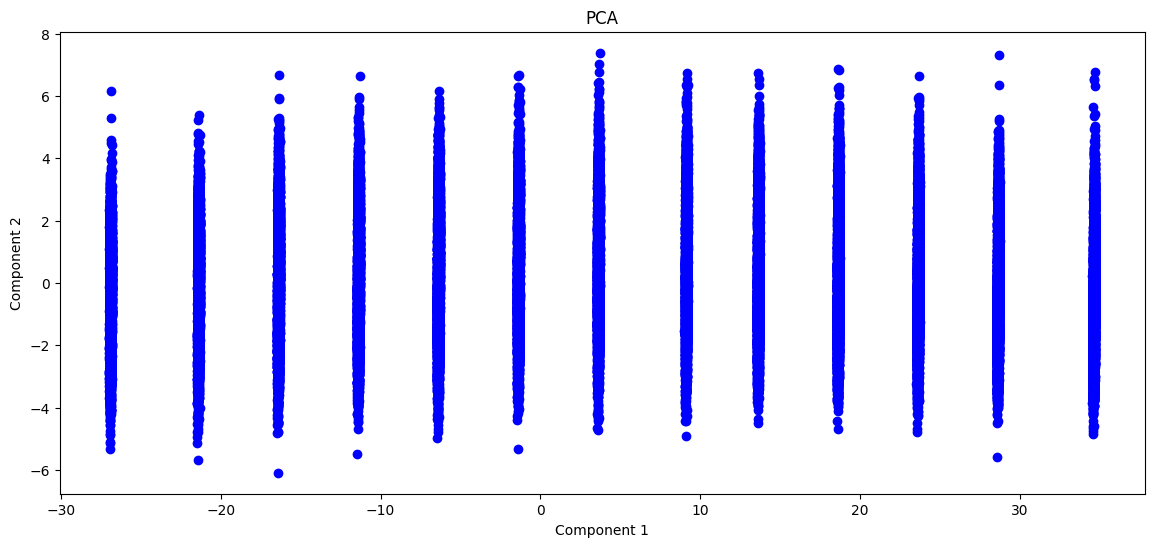

In [63]:
from sklearn.decomposition import PCA

preprocessor = create_preprocessor(binning_features=binning_features, 
                                   ordinal_features=ordinal_features,
                                   onehot_features=[], 
                                   continuous_features=continuous_features,
                                   remainder="frequency")

X_clean_encoded = preprocessor.fit_transform(X_train_clean)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_clean_encoded)

fig, ax = plt.subplots(figsize=(14, 6))

ax.scatter(pca_result[:, 0], pca_result[:, 1], c="blue")
ax.set_title("PCA")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")

plt.show()

As expected, **PCA** performed poorly on data where most features are categorical. Although we can see 13 clusters and some outliers, we cannot clearly understand the shape of these clusters.

In [65]:
X_clean_encoded.shape

(207650, 31)

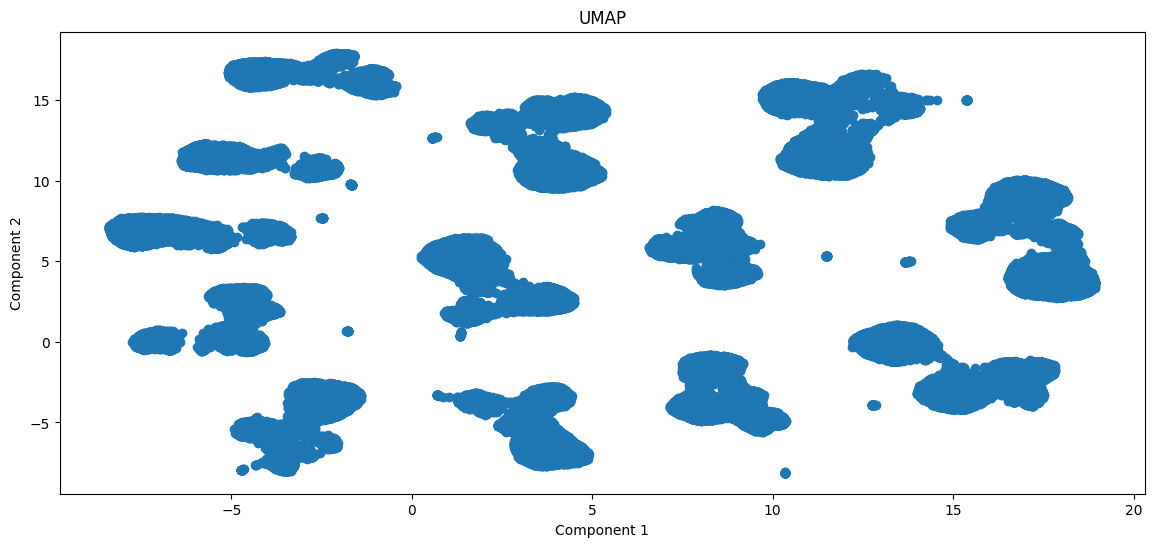

In [66]:
import umap 

umap_reducer = umap.UMAP(n_components=2)
umap_result = umap_reducer.fit_transform(X_clean_encoded)

fig, ax = plt.subplots(figsize=(14, 6))

ax.scatter(umap_result[:, 0], umap_result[:, 1])
ax.set_title("UMAP")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")

plt.show()

**UMAP** created the same number of clusters as PCA but preserved the shape of the clusters and their global structure.

It seems that in this case, the manifold approach works better than projections.

## Clustering

In [70]:
from kmodes.kprototypes import KPrototypes

cat_features = [feature for feature in X_clean_encoded.columns.to_list() if "continuous" not in feature]
cat_indices = [X_clean_encoded.columns.get_loc(feature) for feature in cat_features]

kproto = KPrototypes(n_clusters=13, verbose=1, random_state=42)
clusters = kproto.fit_predict(X_clean_encoded, categorical=cat_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 130096, ncost: 942780.5137361125


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized via UMAP')
plt.show()

In [ ]:
import shap

def add_cluster_indicators(df, clusters):
    cluster_labels = pd.Series(clusters, name='cluster')
    cluster_indicators = pd.get_dummies(cluster_labels, prefix='cluster')
    df_with_clusters = pd.concat([df.reset_index(drop=True), cluster_indicators], axis=1)
    return df_with_clusters, cluster_indicators.columns.tolist()

def analyze_clustering_shap(lgb_model, X_test, cluster_features):
    explainer = shap.TreeExplainer(lgb_model)
    shap_values = explainer.shap_values(X_test)

    if isinstance(shap_values, list):  # For classification tasks
        shap_df = pd.DataFrame(shap_values[1], columns=X_test.columns)
    else:
        shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

    cluster_shap_importance = shap_df[cluster_features].abs().mean().sort_values(ascending=False)

    plt.figure(figsize=(8, 6))
    cluster_shap_importance.plot(kind='barh')
    plt.title('SHAP Importance of Cluster Indicators')
    plt.show()

def analyze_clustering_quality_shap(lgb_model, X_test, cluster_features):
    explainer = shap.TreeExplainer(lgb_model)
    shap_values = explainer.shap_values(X_test)

    if isinstance(shap_values, list):  # For classification tasks
        shap.summary_plot(shap_values[1], X_test[cluster_features], plot_type="bar")
    else:
        shap.summary_plot(shap_values, X_test[cluster_features], plot_type="bar")
        
df_with_clusters, cluster_features = add_cluster_indicators(df, clusters)

# Prepare data for LightGBM
X_with_clusters = df_with_clusters.drop('target', axis=1)
lgb_model, X_train, X_test, y_train, y_test = train_lightgbm(X_with_clusters, y)

# Evaluate feature importance
evaluate_feature_importance(lgb_model, X_train, cluster_features)

# Analyze clustering quality using SHAP
analyze_clustering_shap(lgb_model, X_test, cluster_features)
analyze_clustering_quality_shap(lgb_model, X_test, cluster_features)


# WoE

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted, check_X_y

class WoeEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.woe_dict = {}
    
    def fit(self, X, y):
        X, y = check_X_y(X, y, dtype=None)
        self.classes_ = np.unique(y)
        
        if len(self.classes_) != 2:
            raise ValueError("More than 2 classes in the target feature")
        
        self.woe_dict = {}
        for col in X.columns:
            df = pd.DataFrame({"feature": X[col], "target": y})
            grouped = df.groupby("feature")["target"].agg(["sum"])
            grouped["negatives"] = grouped["count"] - grouped["sum"]

            # Підраховуємо частки подій (p_i) і неподій (q_i)
            grouped["positives_proportions"] = grouped["sum"] / grouped["sum"].sum() 
            grouped["negatives_proportions"] = grouped["negatives"] / grouped["negatives"].sum() 

            # Обчислюємо WoE для кожної категорії
            grouped["WoE"] = np.log(grouped["positives_proportions"] / grouped["negatives_proportions"])

            # Зберігаємо WoE для кожної категорії у словнику
            self.woe_dict_[col] = grouped["WoE"].to_dict()
        return self
        
    def transform():
        check_is_fitted(self, "woe_dict_")
        X = check_array(X, dtype=None)

        X_transformed = np.zeros_like(X, dtype=float)

        for col in X.columns:
            X_transformed[col] = [self.woe_dict_[col].get(val, 0) for val in X[:, col]]

        return X_transformed
    
    def inverse_transform(self, X):
        check_is_fitted(self, "woe_dict_")
        X = check_array(X, dtype=float)

        X_inversed = np.zeros_like(X, dtype=object)

        for col in X.columns:
            inverse_woe = {v: k for k, v in self.woe_dict_[col].items()}
            X_inversed[col] = [inverse_woe.get(val, None) for val in X[col]]

        return X_inversed

    def get_feature_names_out(self, input_features=None):
        check_is_fitted(self, "woe_dict_")
        if input_features is None:
            input_features = [f"feature_{i}" for i in range(len(self.woe_dict_))]
        return np.array([f"{feature}_WoE" for feature in input_features])
        